In [1]:
# If the below code doesn't work uncomment this and run (this adds the parent directory to the path)
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 


In [2]:
import matplotlib.pyplot as plt
from BasicSetupUtilities.MetaDataBuilder import CountryMetaDataFile
from DataIOUtilities.DataLib import DataLib, DatastreamPulls
import pandas as pd
import numpy as np
import utilityfunctions as uf
import generate_indicators as gi

In [3]:
countryList = ['USA', 'AUS', 'JPN', 'CAN', 'CHE', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU']
countries = CountryMetaDataFile().readMetadata().loc[countryList]
start_date = '1980-01'


##Bespoke code name dictionaries
MSCIEquityDictionary = {
                        'US':'MSUSAML',
                        'AU':'MSAUSTL',
                        'JP':'MSJPANL',
                        'CN':'MSCNDAL',
                        'SW':'MSSWITL',
                        'UK':'MSUTDKL',
                        'ES':'MSSPANL',
                        'FR':'MSFRNCL',
                        'IT':'MSITALL',
                        'BD':'MSGERML'
}

dl = DataLib("SignalData")
dsPuller = DatastreamPulls(countries)

In [4]:
locs = ['USA', 'AUS', 'JPN', 'CAN', 'CHE', 'GBR', 'ESP', 'FRA', 'ITA', 'DEU']
tf = ['1980-01-01', '2020-01-01']

In [5]:
bondReturnIdx_locFX = dsPuller.ds_country_pull(lambda x: f'BM{x}10Y', start_date, 'RI', 'D')

In [6]:
bond_one_year_rolling_returns = bondReturnIdx_locFX.rolling(261, min_periods=100).apply(lambda x: x.iloc[-1] / x.iloc[0] - 1, raw=False)
bond_one_year_rolling_returns['mean'] = bond_one_year_rolling_returns.mean(axis=1)
shifted_returns = bond_one_year_rolling_returns.shift(-261)
shifted_returns_diff_from_mean = shifted_returns.subtract(shifted_returns['mean'], axis=0)
half_shifted_returns = bond_one_year_rolling_returns.shift(-130)
quarterly_returns_shifted = bondReturnIdx_locFX.resample("Q").last().shift(-1).pct_change(1)

In [7]:
LongRates = dl.pull('LongRates')
ShortRates = dl.pull('ShortRates')

In [8]:
bond_risk_premium = LongRates - ShortRates

In [9]:
curve_height = (LongRates + ShortRates) / 2

['1980-01-01', '2020-01-01']


c:\users\19177\.virtualenvs\internship2020-cuzesdj7\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


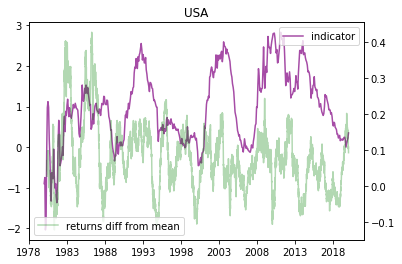

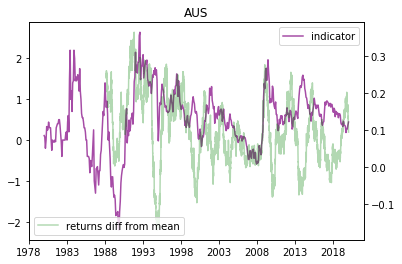

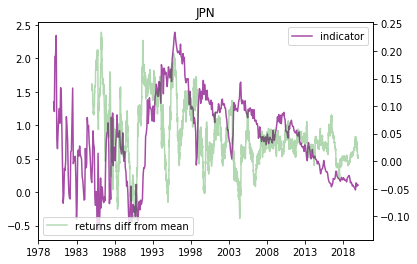

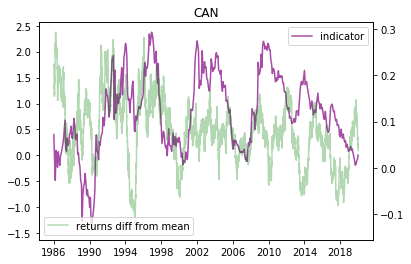

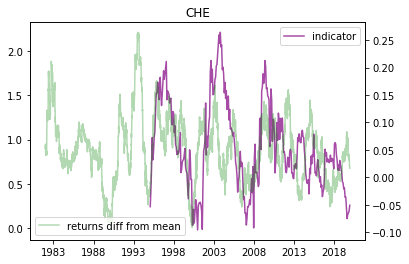

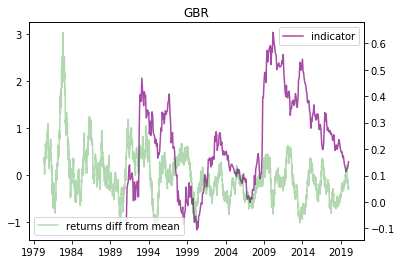

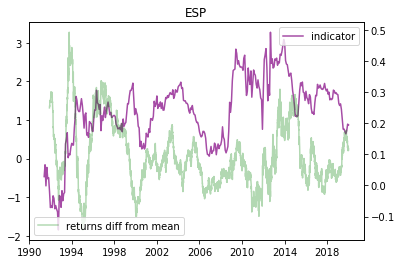

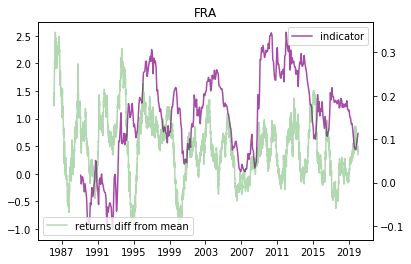

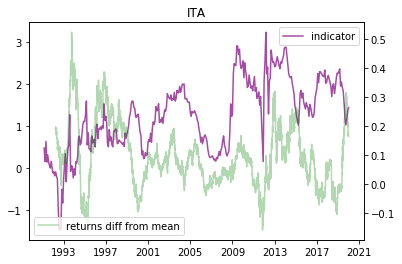

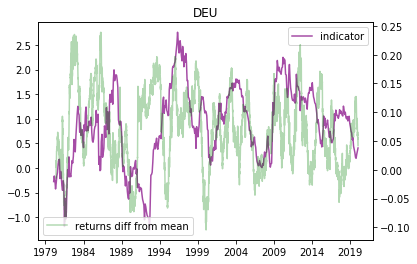

In [10]:
tfs = [tf]
uf.plot_vs_returns(countryList, bond_risk_premium, bond_one_year_rolling_returns, tfs, scale=False)

['1980-01-01', '2020-01-01']


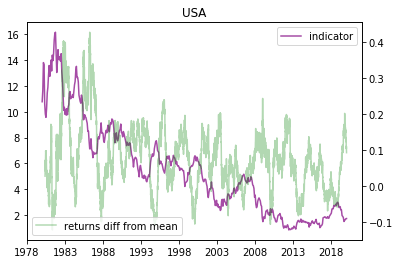

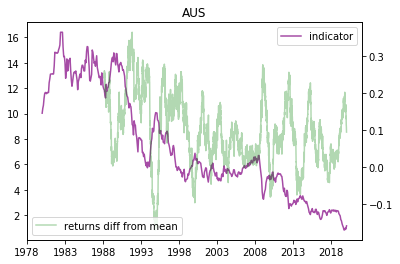

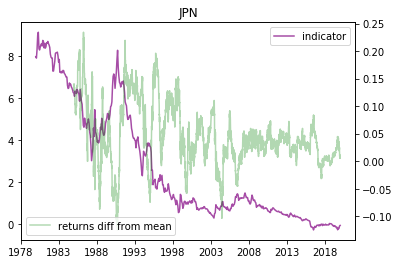

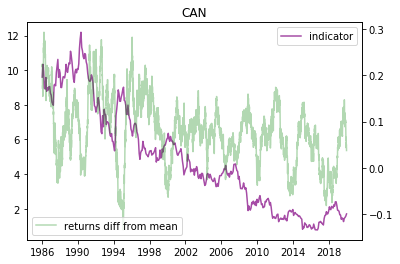

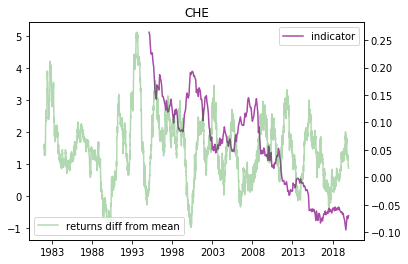

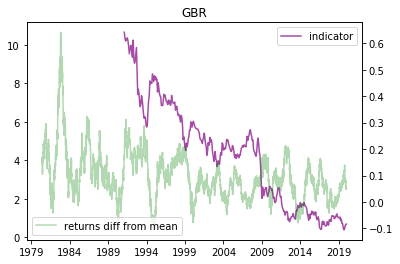

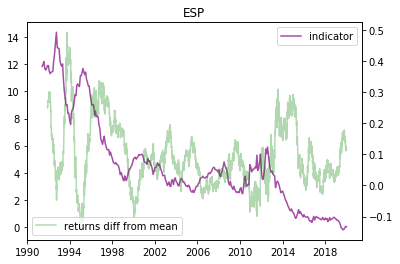

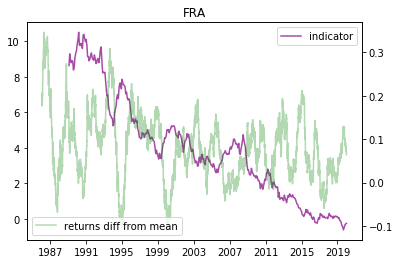

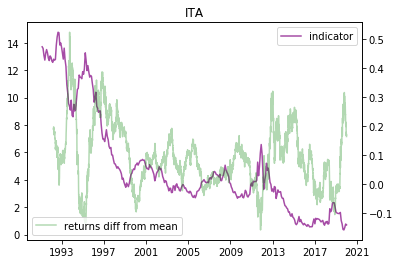

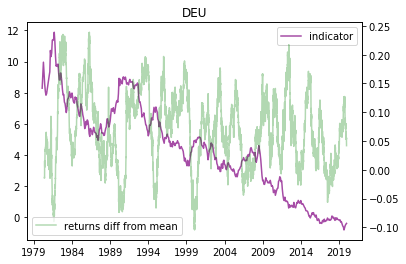

In [11]:
uf.plot_vs_returns(countryList, curve_height, bond_one_year_rolling_returns, tfs, scale=False)

In [12]:
indicator_one = gi.generate_indicator_one(bond_risk_premium, curve_height)

['1986-01-01', '1995-01-01']


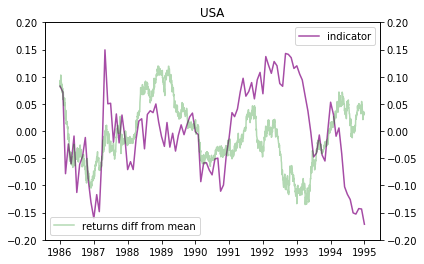

-0.09236081747313403


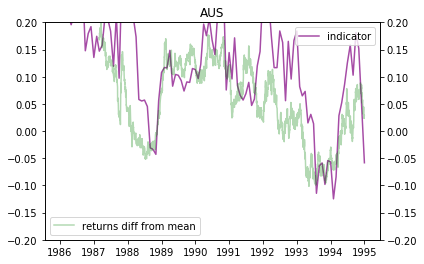

0.5305194305534777


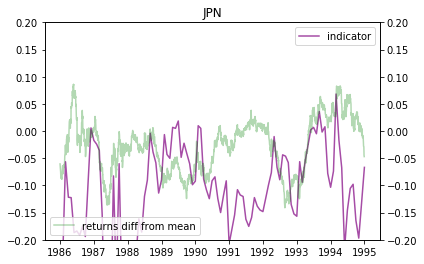

0.04286956008489448


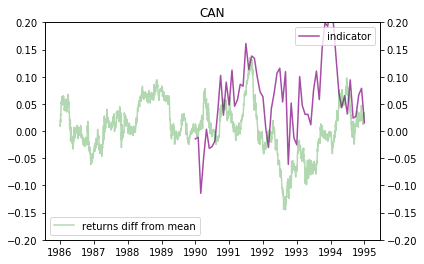

0.1036877495075874


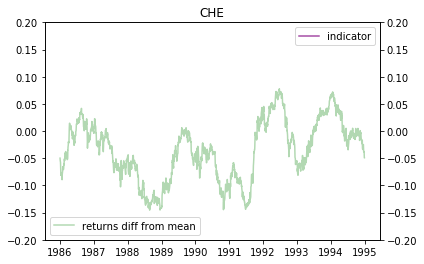

nan


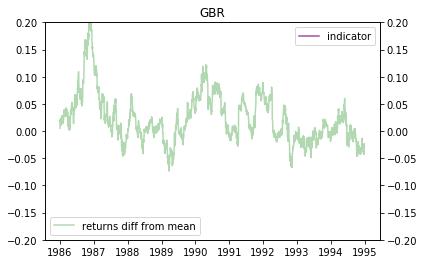

nan


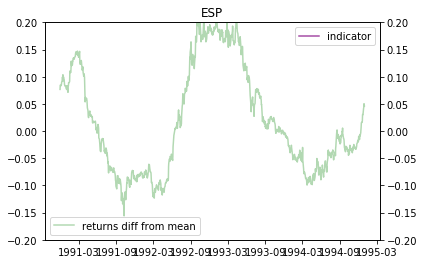

nan


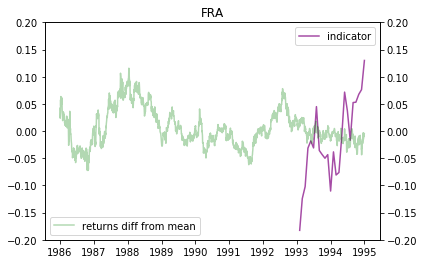

-0.6787390429918821


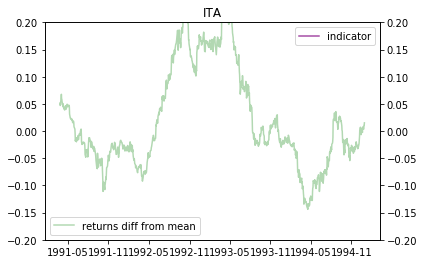

nan


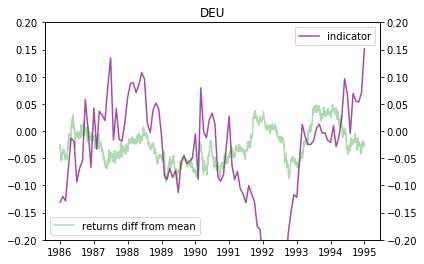

-0.030577369720575967
['1995-01-01', '2003-01-01']


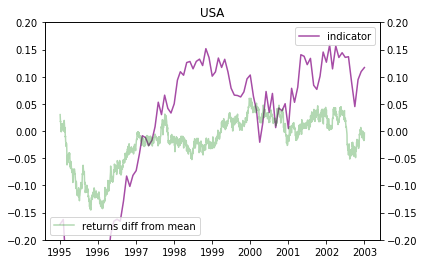

0.7949842206239138


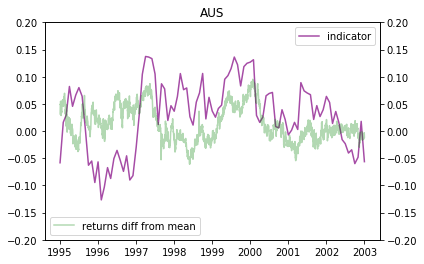

0.0943030650383336


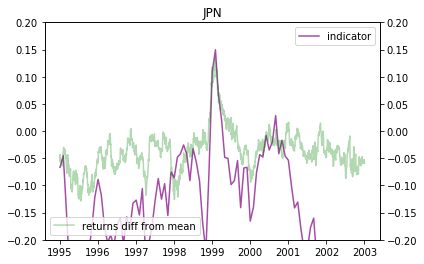

0.5285565437217522


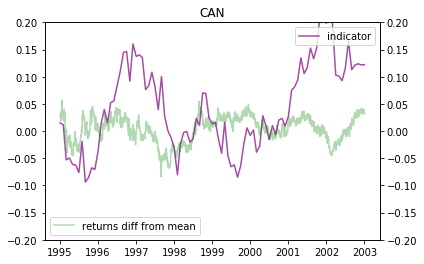

-0.007404158914557266


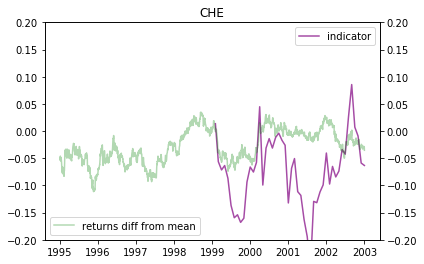

0.18880658352287247


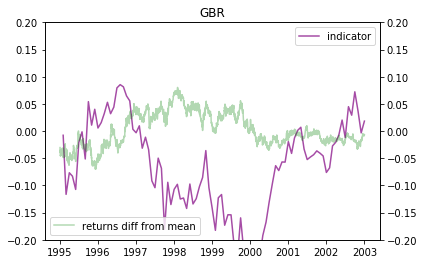

-0.3127287418391465


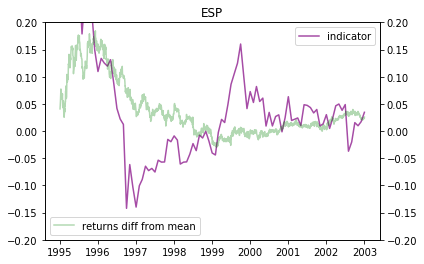

0.5408351820029013


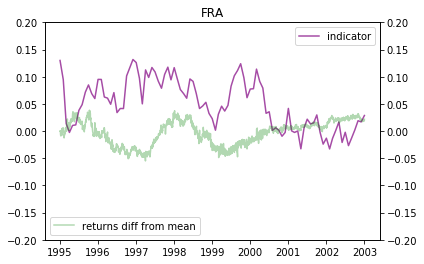

-0.38601002060585893


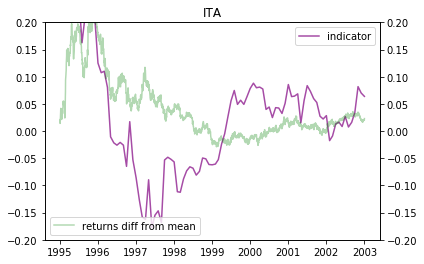

0.4888394559067215


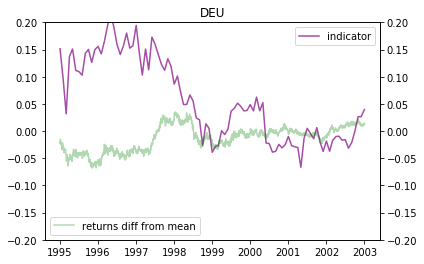

-0.503224919489903
['2003-01-01', '2008-01-01']


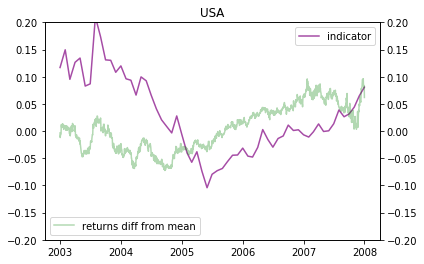

-0.23503633109051889


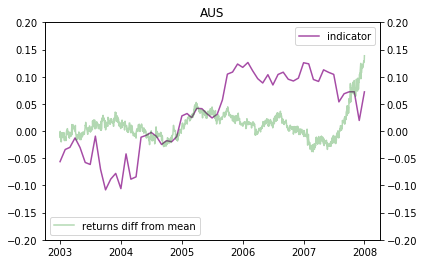

0.06681458485947286


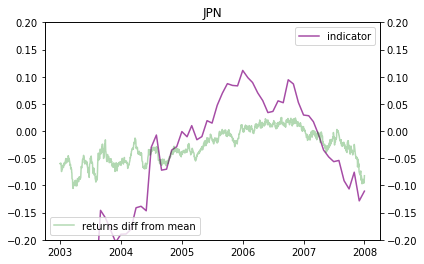

0.7690177721551053


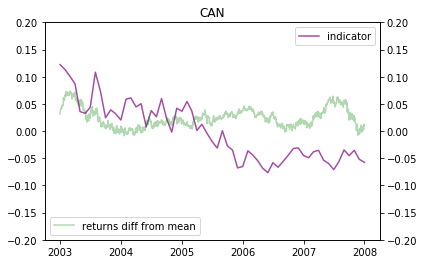

0.011472411513418823


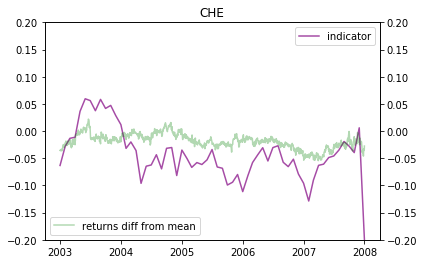

0.37450051730594003


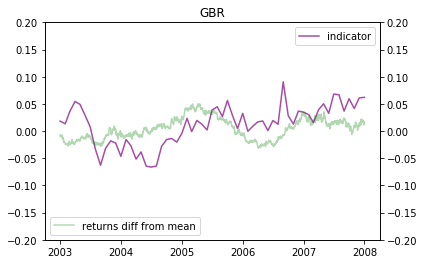

0.1621835525716201


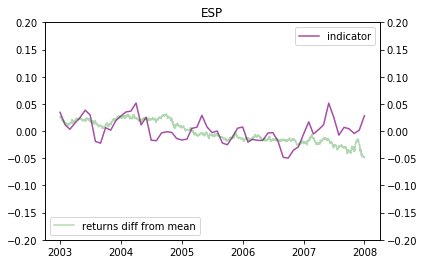

0.2931051684396971


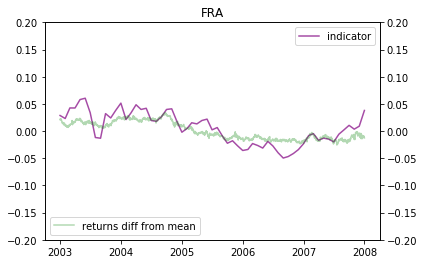

0.8197152372791489


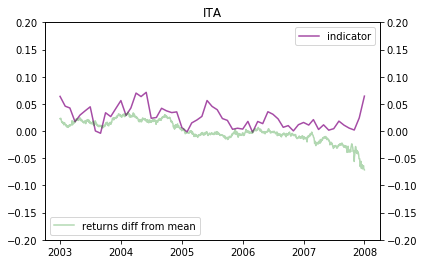

0.3479882254223204


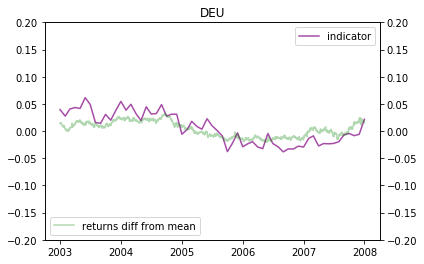

0.7859325334622422
['2008-01-01', '2016-01-01']


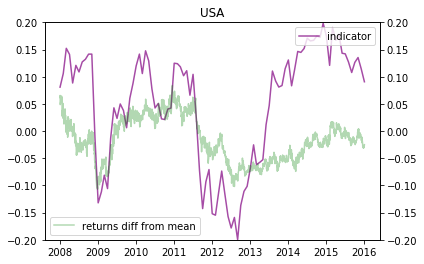

0.47703857203530486


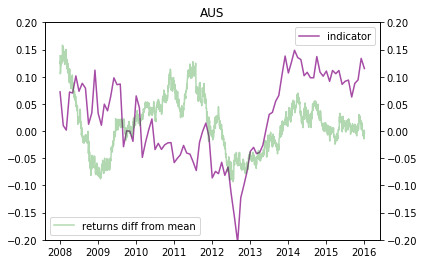

0.12307934298613571


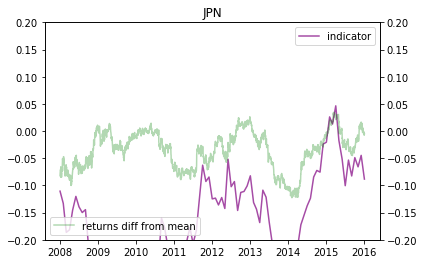

0.2899701244720728


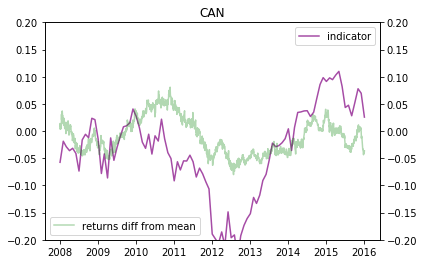

0.44962709115141886


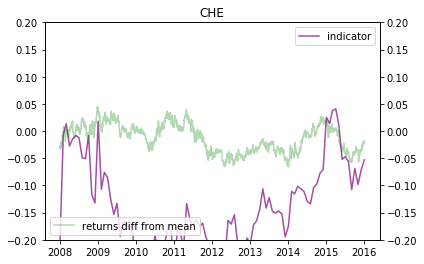

0.19367217489260968


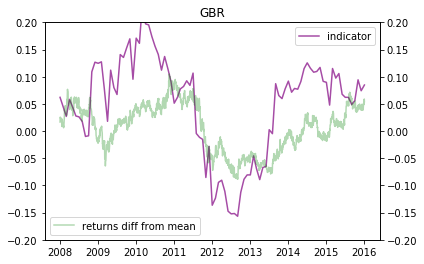

0.649831303818641


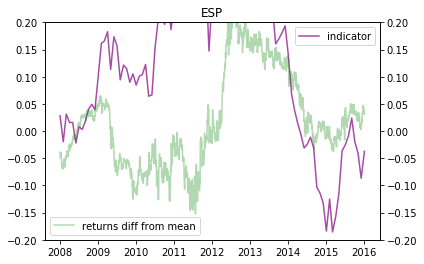

0.4376461006368777


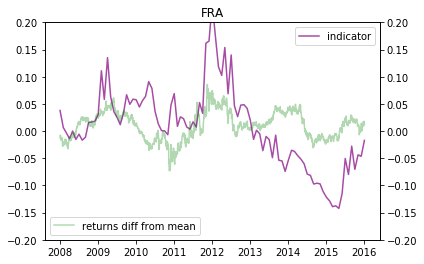

0.27966270180669517


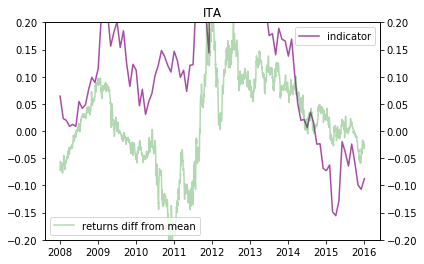

0.46460307324104927


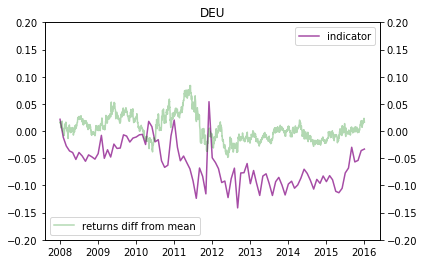

0.3465855593308679
['2016-01-01', '2020-01-01']


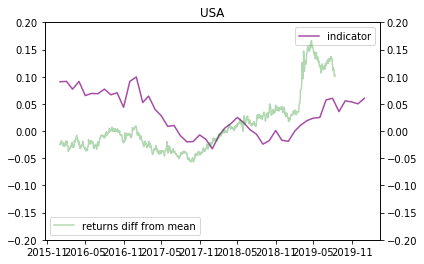

-0.11731909210415206


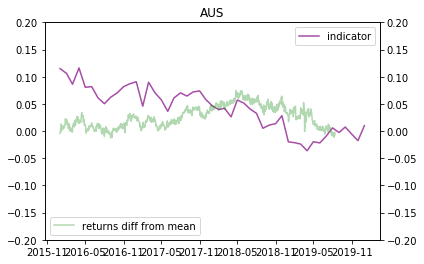

-0.11035644843149528


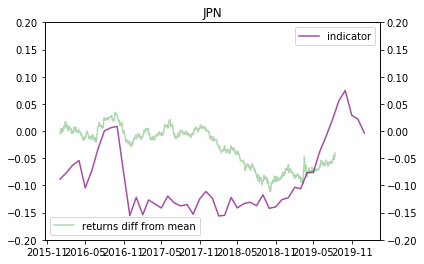

0.22044555938292099


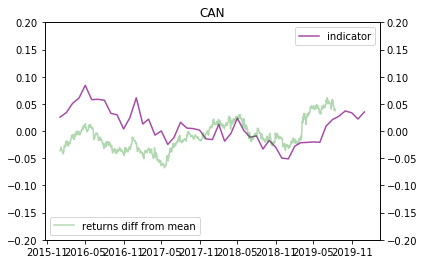

-0.15004910039595826


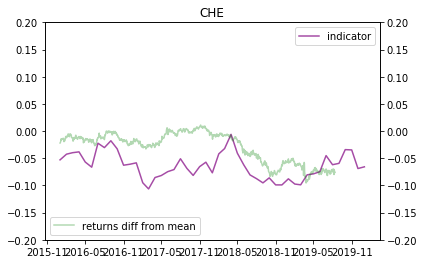

0.49234261775369853


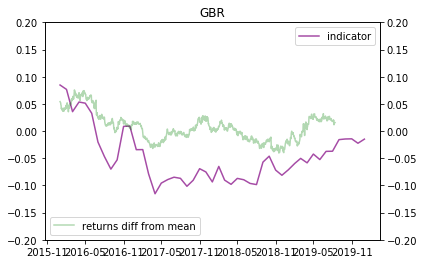

0.7535810187931453


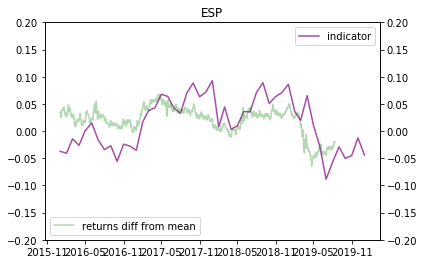

0.3211442809015973


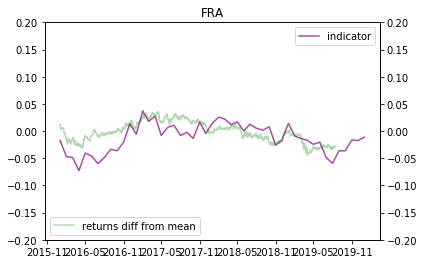

0.4873983286851527


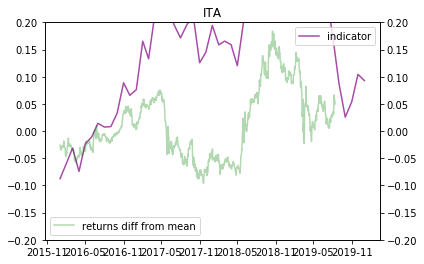

0.5343755145605863


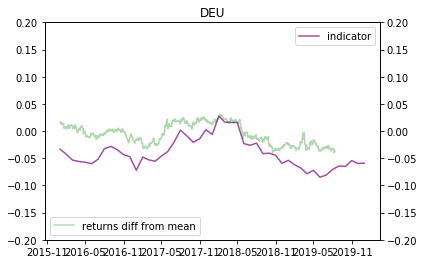

0.739578218830716


In [13]:
tf0 = ["1986-01-01", "1995-01-01"]
tf1 = ["1995-01-01", "2003-01-01"]
tf2 = ["2003-01-01", "2008-01-01"]
tf3 = ["2008-01-01", "2016-01-01"]
tf4 = ["2016-01-01", "2020-01-01"]
tfs = [tf0, tf1, tf2, tf3, tf4]

uf.plot_vs_returns(countryList, indicator_one, shifted_returns_diff_from_mean, tfs, correlation=True)

In [14]:
#M2 Construction testing
#idea - change in m2 can be approximated with average change in m1 and m3

m1_money_supply = dsPuller.ds_country_pull(lambda x: f'{x}CMS1..B', start_date, '', 'M')
m2_money_supply = dsPuller.ds_country_pull(lambda x: f'{x}CMS2..B', start_date, '', 'M',list(filter(lambda x: x !='AUS', countryList)))
m3_money_supply = dsPuller.ds_country_pull(lambda x: f'{x}CMS3..B', start_date, '', 'M',list(filter(lambda x: x !='USA', countryList)))


In [15]:
m2_proxy = .5 * m1_money_supply + .5 * m3_money_supply

In [16]:
m2_proxy["USA"] = m2_money_supply["USA"]

In [17]:
#using idea from paper - rolling three month divided by past year
indicator_two_attempt_one = change_in_money_supply = m2_proxy.rolling(3).mean() / m2_proxy.rolling(12).mean()

In [18]:
indicator_two_attempt_one = indicator_two_attempt_one - 1

In [19]:
indicator_two = gi.generate_indicator_two(m1_money_supply, m2_money_supply, m3_money_supply)

['1986-01-01', '1995-01-01']


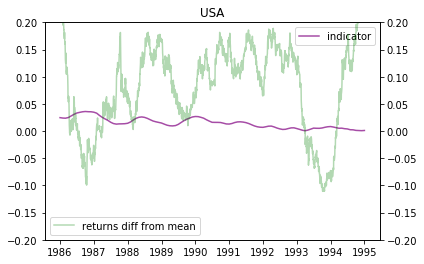

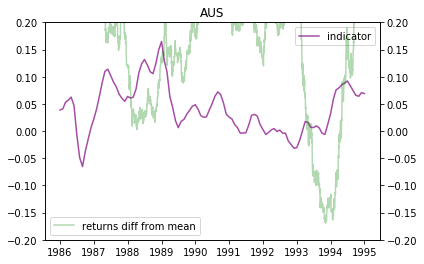

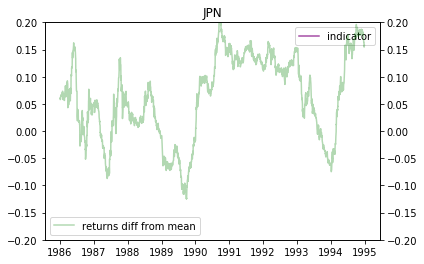

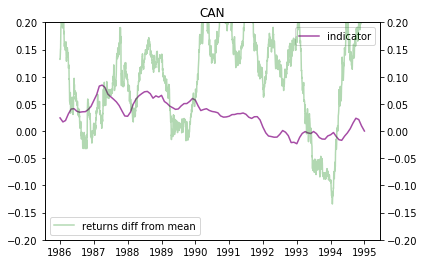

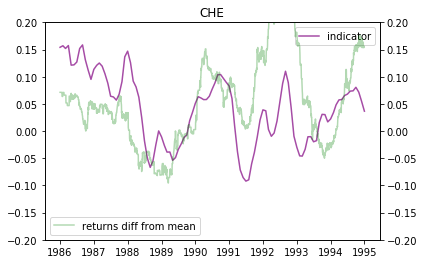

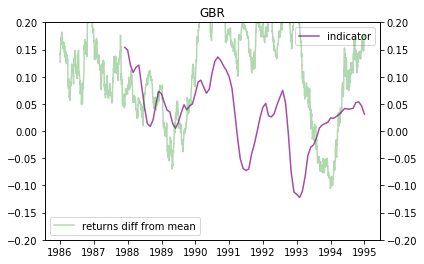

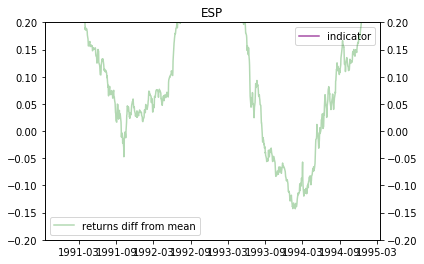

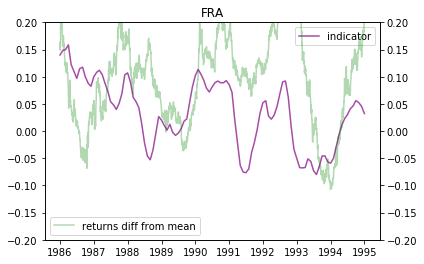

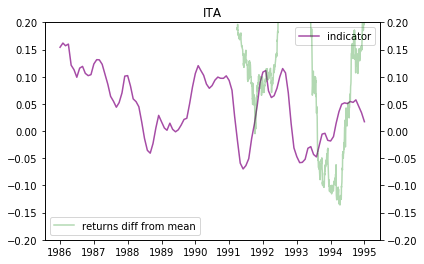

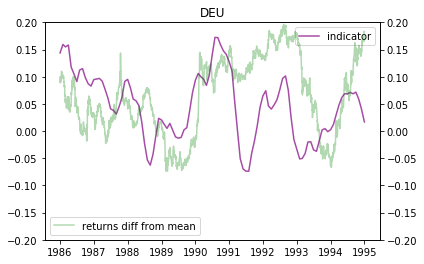

['1995-01-01', '2003-01-01']


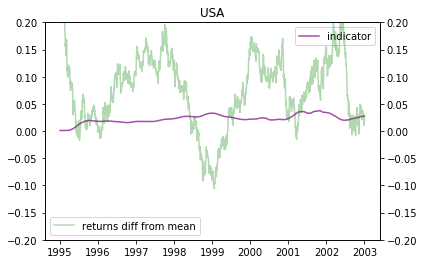

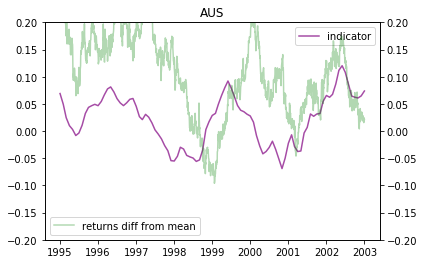

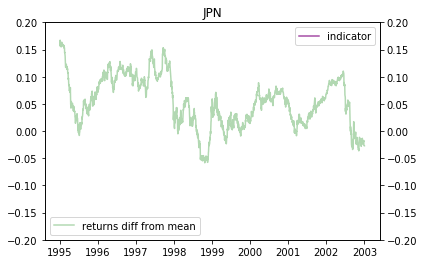

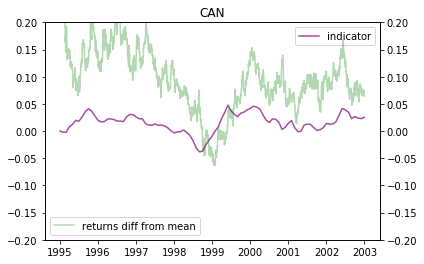

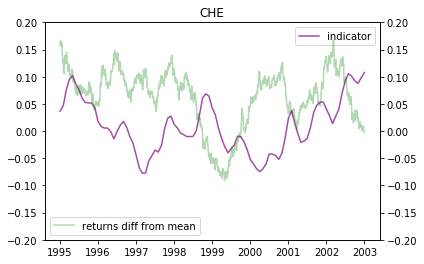

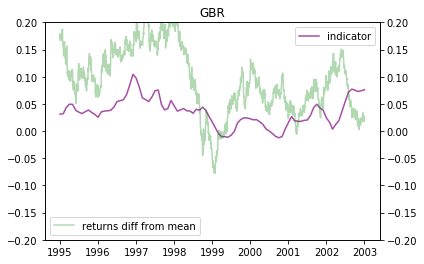

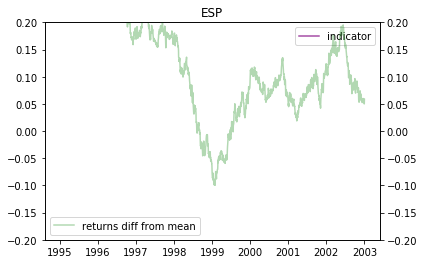

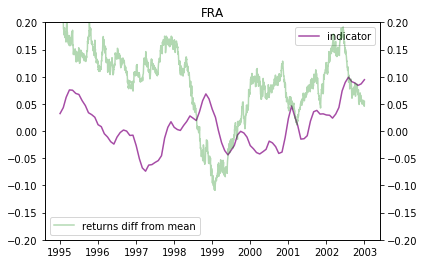

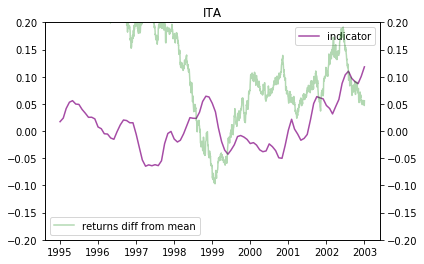

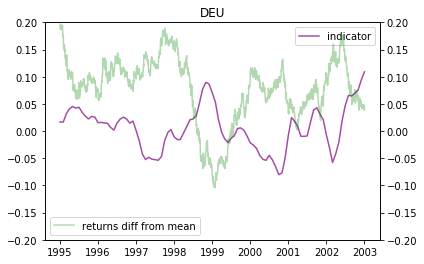

['2003-01-01', '2008-01-01']


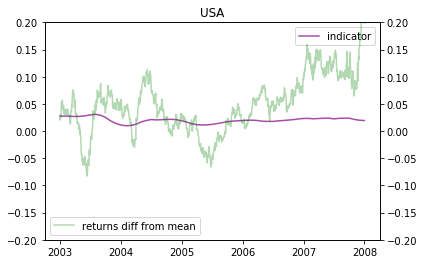

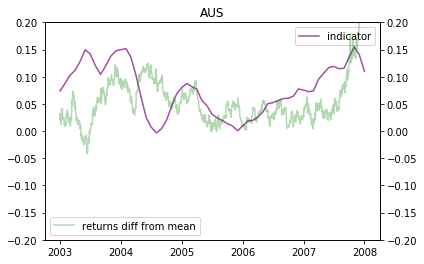

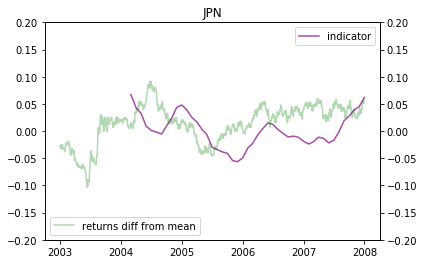

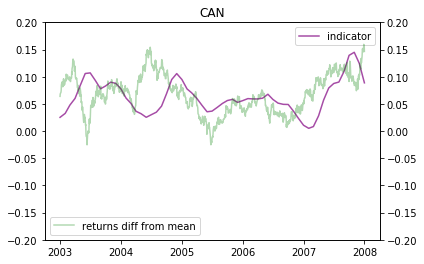

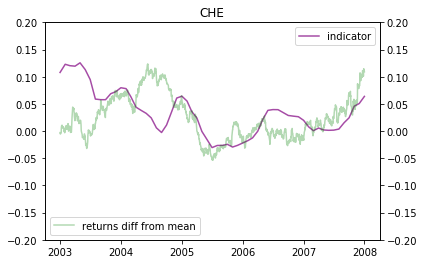

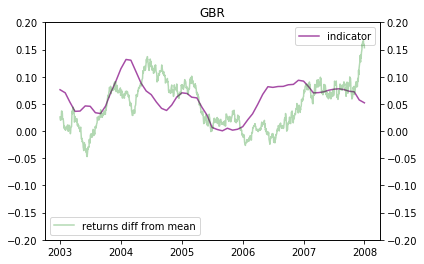

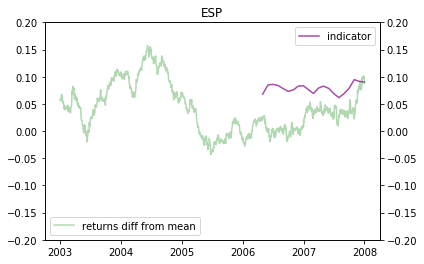

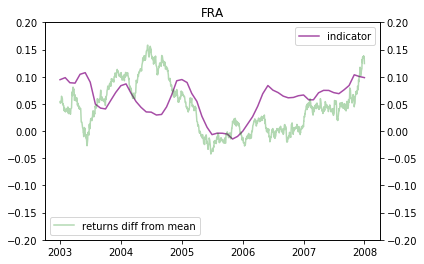

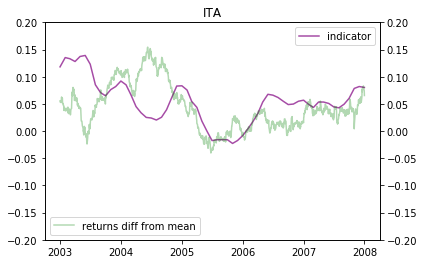

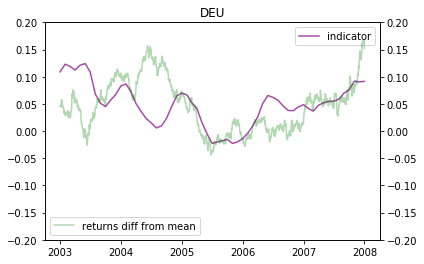

['2008-01-01', '2016-01-01']


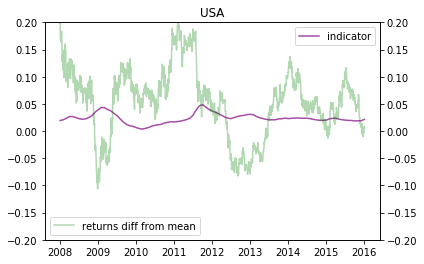

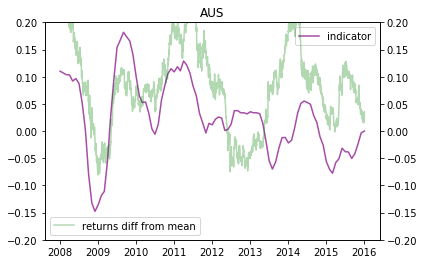

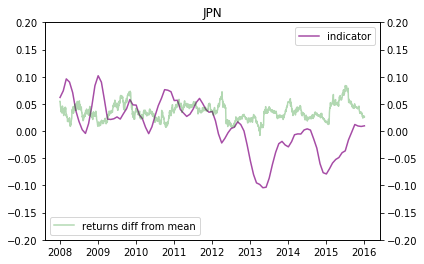

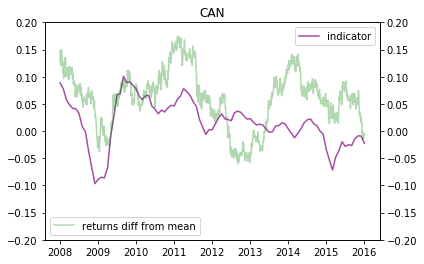

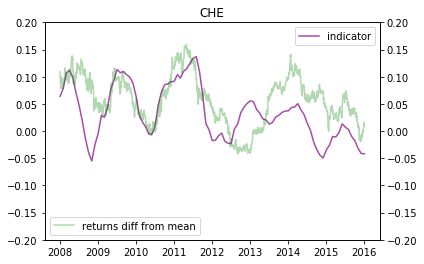

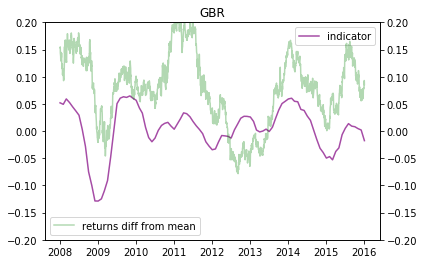

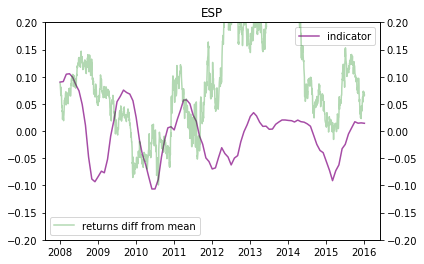

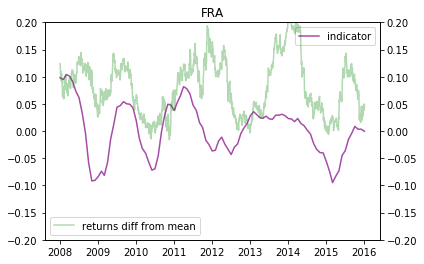

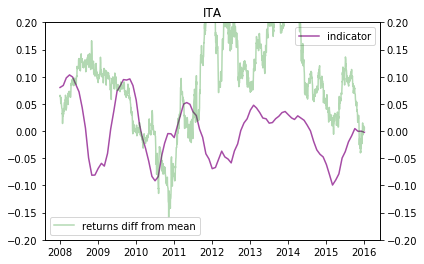

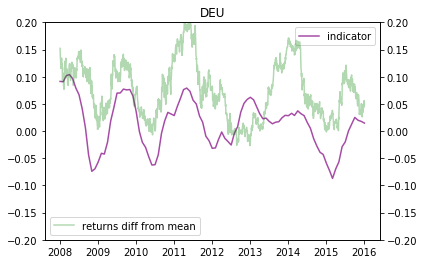

['2016-01-01', '2020-01-01']


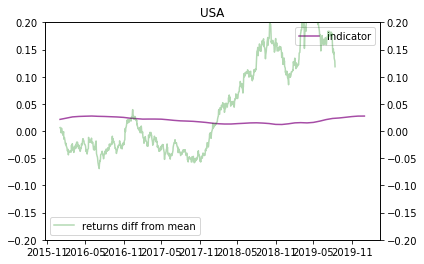

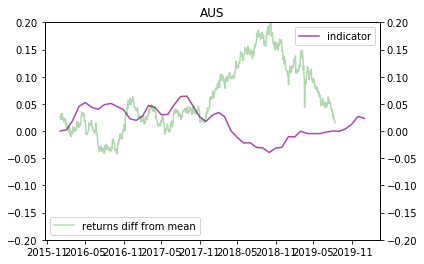

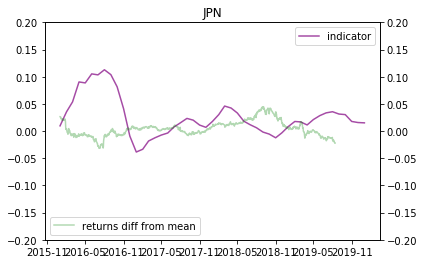

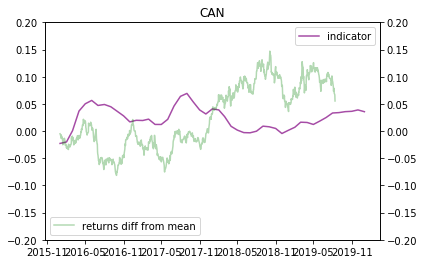

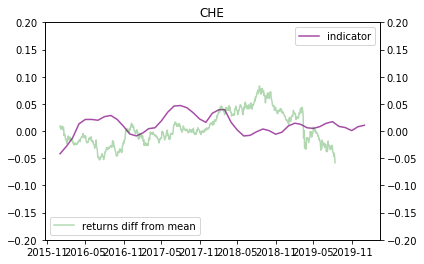

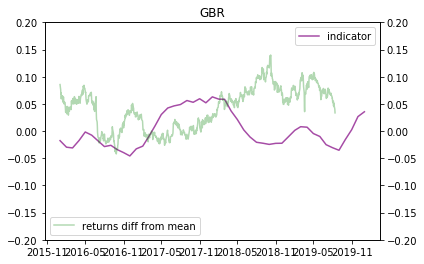

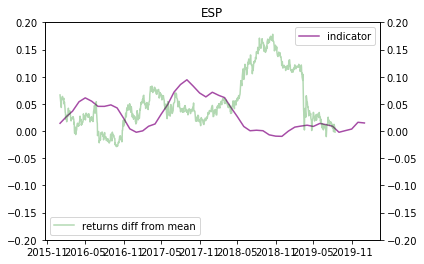

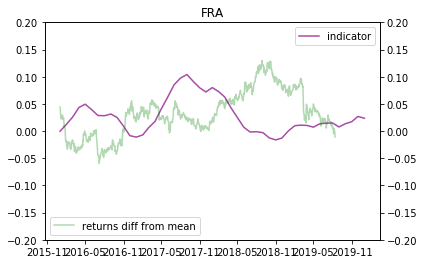

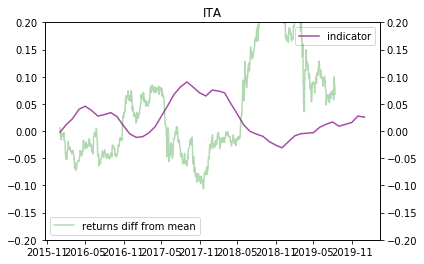

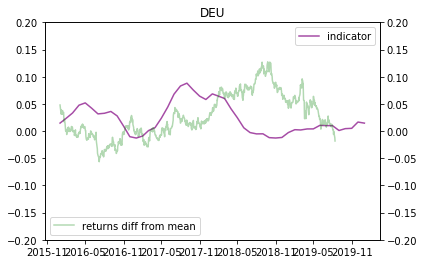

In [20]:
uf.plot_vs_returns(countryList, indicator_two, shifted_returns, tfs, scale=True)

In [21]:
#idea 3)
#use currency appreciation (twi) to predict bond returns.
fxVsUSD = dsPuller.ds_country_pull(lambda x: f'{x}XRUSD.', start_date, '', 'M')
fxRealPrices_TrdWts = dsPuller.ds_country_pull(lambda x: f'{x}CXTR..F', start_date, '', 'M',['USA', 'AUS', 'JPN', 'CHE', 'GBR'])

In [22]:
relative_value = fxVsUSD
relative_value["GBR"] = 1 / fxVsUSD["GBR"]
relative_value
change_in_fx = relative_value.rolling(3).mean() / relative_value.shift(3).rolling(12).mean() - 1
change_in_fx

country       AUS       DEU       CAN       ESP       FRA       ITA       JPN  \
date                                                                            
1980-01       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-02       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-03       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-04       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-05       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-06       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-07       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-08       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-09       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-10       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-11       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1980-12       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1981-01       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1981-02       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1981-03 -0.025061  0.148626  0.020826  0.171104  0.150941  0.170163 -0.092119   
1981-04 -0.012428  0.161388  0.018908  0.183761  0.173702  0.201390 -0.061143   
1981-05 -0.001984  0.167197  0.016411  0.183504  0.193098  0.222387 -0.024866   
1981-06  0.010053  0.201527  0.018735  0.201218  0.230657  0.259712  0.013599   
1981-07  0.017992  0.234789  0.024194  0.223730  0.264408  0.286596  0.054070   
1981-08  0.019158  0.243724  0.028428  0.234543  0.269855  0.289497  0.077137   
1981-09  0.015819  0.208754  0.023698  0.209476  0.233856  0.251975  0.082771   
1981-10  0.014321  0.144498  0.017016  0.169823  0.184967  0.204662  0.077351   
1981-11  0.010931  0.069326  0.002541  0.118922  0.124615  0.148690  0.057516   
1981-12  0.013507  0.031151 -0.004324  0.097542  0.102501  0.124216  0.034867   
1982-01  0.020250  0.021710 -0.009551  0.085082  0.091481  0.107829  0.015649   
1982-02  0.037515  0.031068 -0.002257  0.086396  0.096791  0.106994  0.030497   
1982-03  0.058519  0.038098  0.008369  0.096248  0.103524  0.110081  0.060820   
1982-04  0.073567  0.042207  0.017257  0.106242  0.108762  0.114744  0.080583   
1982-05  0.075498  0.025416  0.021710  0.099182  0.091323  0.099882  0.070305   
1982-06  0.076751  0.022217  0.034858  0.097572  0.097445  0.097659  0.072323   
...           ...       ...       ...       ...       ...       ...       ...   
2018-03 -0.025092 -0.083281 -0.025508 -0.083288 -0.083295 -0.083288 -0.034765   
2018-04 -0.008500 -0.074563 -0.012795 -0.074576 -0.074579 -0.074576 -0.041062   
2018-05  0.008757 -0.048889 -0.002033 -0.048896 -0.048896 -0.048895 -0.031851   
2018-06  0.021999 -0.019481  0.006026 -0.019506 -0.019503 -0.019506 -0.014803   
2018-07  0.036672  0.008134  0.021023  0.008114  0.008113  0.008114 -0.001731   
2018-08  0.046893  0.021542  0.030340  0.021532  0.021532  0.021532  0.003984   
2018-09  0.059881  0.025585  0.029068  0.025579  0.025577  0.025579  0.010577   
2018-10  0.069564  0.032895  0.022958  0.032887  0.032887  0.032887  0.015223   
2018-11  0.066522  0.036460  0.024198  0.036459  0.036460  0.036459  0.021340   
2018-12  0.059335  0.042756  0.029442  0.042769  0.042773  0.042769  0.021086   
2019-01  0.049050  0.042721  0.034279  0.042734  0.042734  0.042734  0.009653   
2019-02  0.049768  0.040344  0.031556  0.040352  0.040353  0.040352  0.000532   
2019-03  0.048342  0.039406  0.025526  0.039418  0.039422  0.039418 -0.002330   
2019-04  0.041256  0.039109  0.021764  0.039135  0.039139  0.039135  0.007192   
2019-05  0.042703  0.037041  0.024175  0.037055  0.037055  0.037055  0.003795   
2019-06  0.041564  0.029901  0.019281  0.029913  0.029908  0.029913 -0.009274   
2019-07  0.041215  0.023090  0.

In [23]:
change_in_twi = fxRealPrices_TrdWts.rolling(3).mean() / fxRealPrices_TrdWts.shift(3).rolling(12).mean() - 1

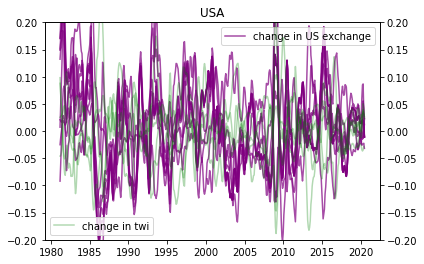

-0.8430804604244346


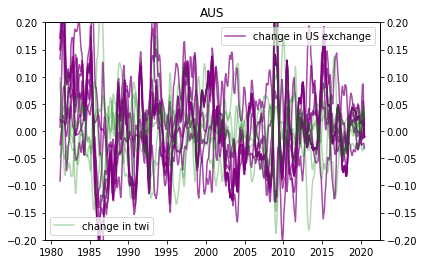

-0.8447430954225463


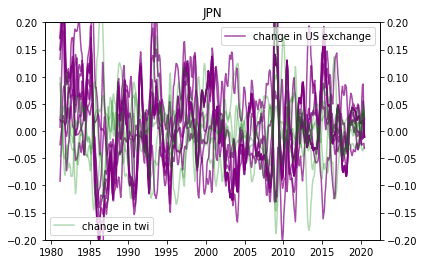

-0.8928792034311404


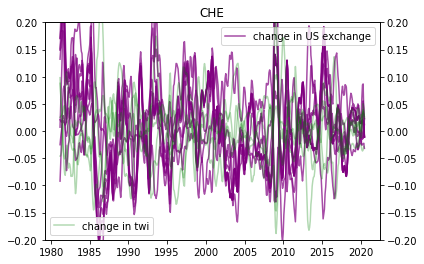

-0.6539278492652969


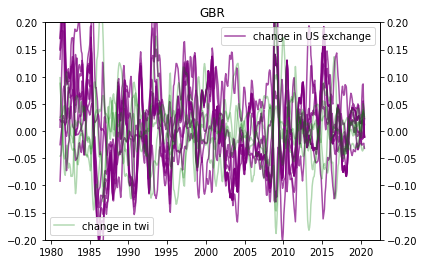

-0.6221764020850556


In [24]:
#fx isn't perfectly in line with twi so need to proxy
for country in ['USA', 'AUS', 'JPN', 'CHE', 'GBR']:
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(change_in_fx.to_timestamp(), color = 'purple', alpha=.7)
    ax2.plot(change_in_twi.to_timestamp(), color = "green", alpha=.3)
    ax1.legend(["change in US exchange"], loc = 'upper right')
    ax2.legend(["change in twi"], loc="lower left")
    ax1.set(ylim=(-.2, .2))
    ax2.set(ylim=(-.2, .2))
    uf.align_yaxis(ax1, 0, ax2, 0)
    plt.title(country)
    plt.show()
    print(change_in_fx[country].corr(change_in_twi[country]))


In [25]:
GBR_twi_proxy_pt1 = (1 / fxVsUSD["GBR"] * fxVsUSD["CHE"] * fxRealPrices_TrdWts["CHE"])
change_in_proxy_GBR = GBR_twi_proxy_pt1.rolling(3).mean() / GBR_twi_proxy_pt1.shift(3).rolling(12).mean() - 1
change_in_proxy_GBR
GBR_twi_proxy_pt2 = (1 / fxVsUSD["GBR"] * fxVsUSD["CHE"])
change_in_proxy_GBR_adj = GBR_twi_proxy_pt2.rolling(3).mean() / GBR_twi_proxy_pt2.shift(3).rolling(12).mean() - 1
change_in_proxy_GBR_better = .97 * change_in_proxy_GBR - .03 * change_in_proxy_GBR_adj

print(change_in_proxy_GBR_better.corr(change_in_twi["GBR"]))


0.969302998689307


In [26]:
CHE_twi_proxy_pt1 = (1 / fxVsUSD["CHE"] * fxVsUSD["GBR"] * fxRealPrices_TrdWts["GBR"])
change_in_proxy_CHE = CHE_twi_proxy_pt1.rolling(3).mean() / CHE_twi_proxy_pt1.shift(3).rolling(12).mean() - 1
CHE_twi_proxy_pt2 = (1 / fxVsUSD["CHE"] * fxVsUSD["GBR"])
change_in_proxy_CHE_adj = CHE_twi_proxy_pt2.rolling(3).mean() / CHE_twi_proxy_pt2.shift(3).rolling(12).mean() - 1
change_in_proxy_CHE_better = .9 * change_in_proxy_CHE + .1 * change_in_proxy_CHE_adj

print(change_in_proxy_CHE_better.corr(change_in_twi["CHE"]))

0.9614093872733076


In [27]:
change_in_twi_proxy = gi.create_twi_proxy(fxVsUSD, fxRealPrices_TrdWts)


In [28]:
print(change_in_twi_proxy["FRA"].corr(change_in_fx["FRA"]))

-0.8300009400307207


['1986-01-01', '1995-01-01']


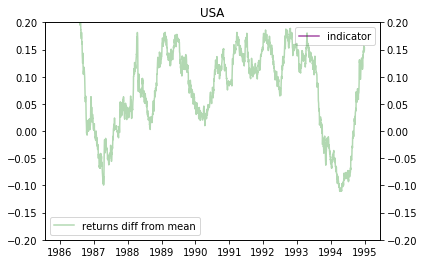

nan


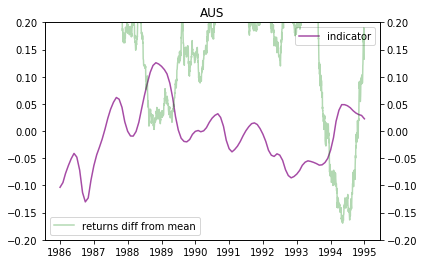

-0.39590003272376334


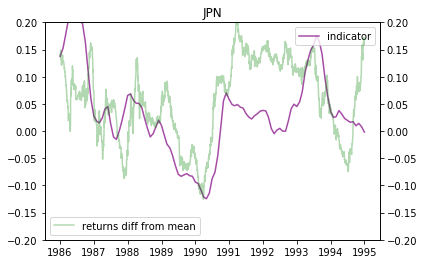

0.4410555718228222


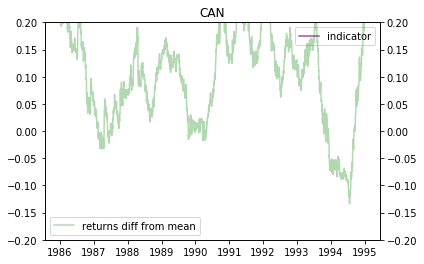

nan


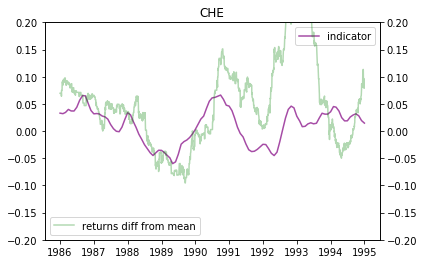

0.37700865260859345


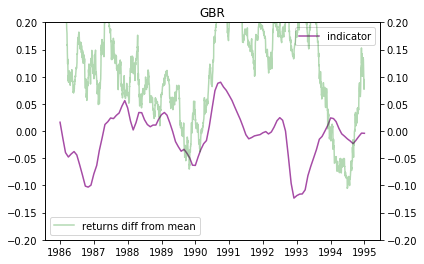

0.09755366013146438


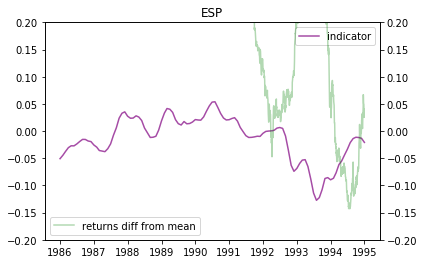

-0.36051032947492345


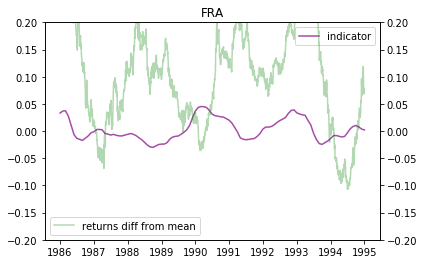

0.26945497438643284


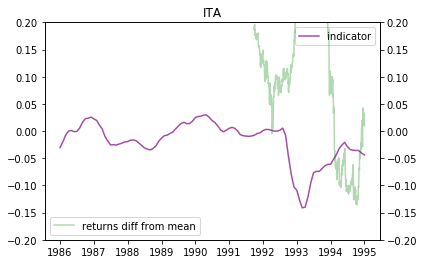

-0.65865929667026


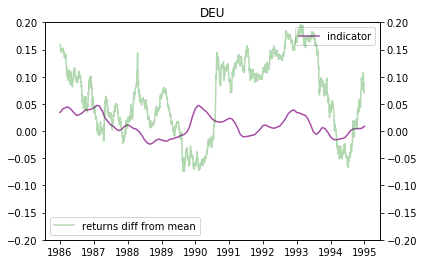

0.1837994432380277
['1995-01-01', '2003-01-01']


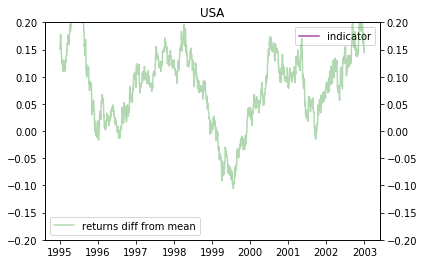

nan


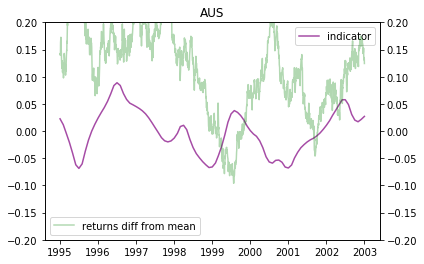

0.10096146105501554


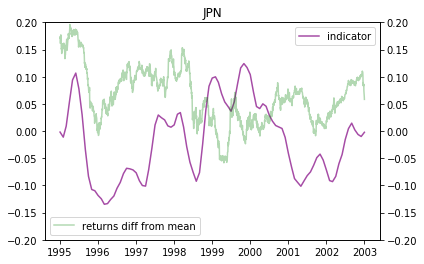

-0.07957274503760457


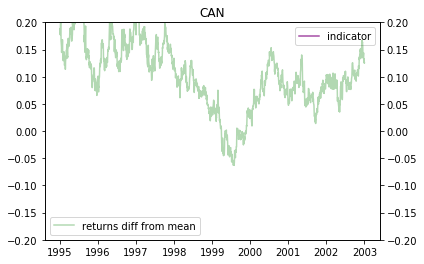

nan


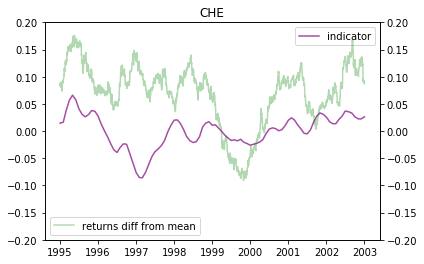

0.26173539061589474


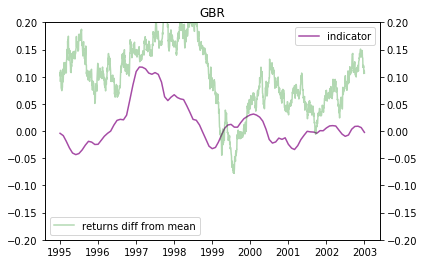

0.4504181530406523


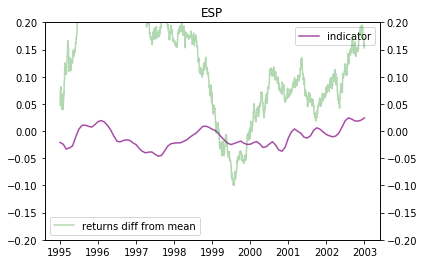

0.15469367302844822


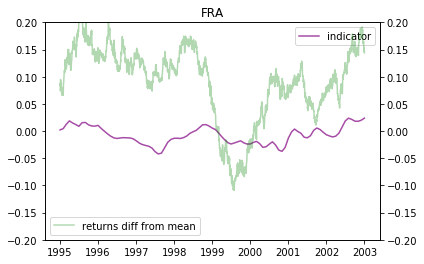

0.430299882847887


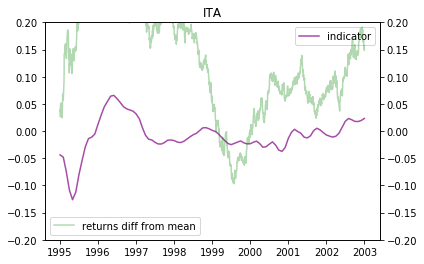

0.3114582834070196


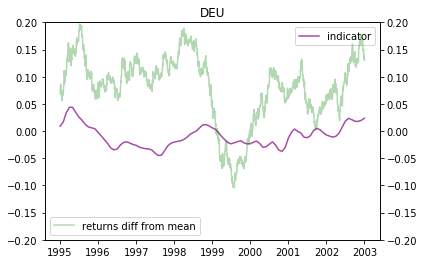

0.2710775336856456
['2003-01-01', '2008-01-01']


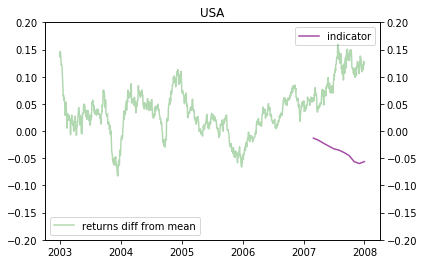

-0.7085383458434744


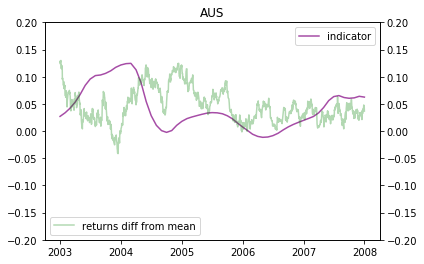

-0.16219276010214698


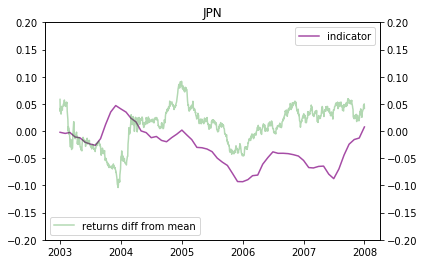

-0.13131587878014808


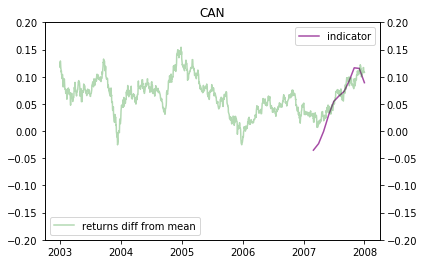

0.977551655927532


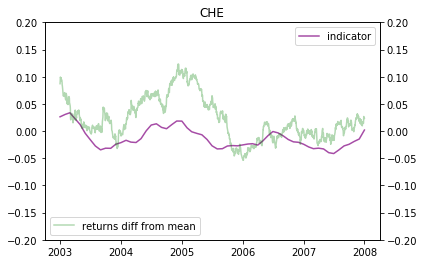

0.6241055328300871


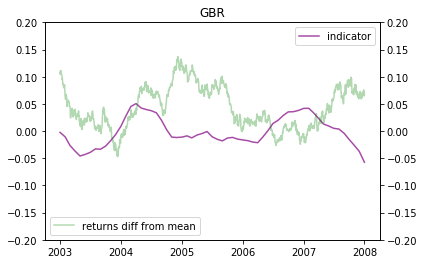

-0.06775440736584014


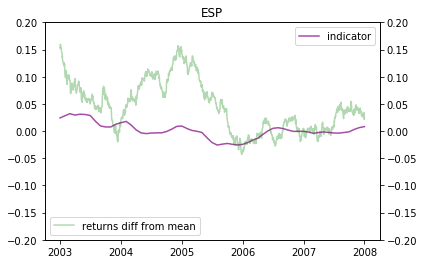

0.39533525643099804


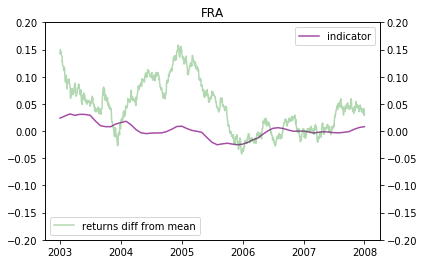

0.3505036978770276


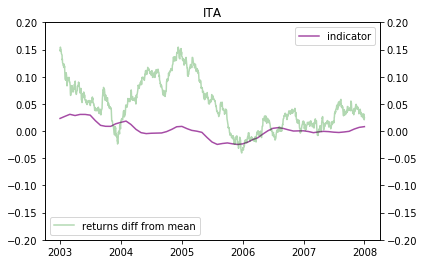

0.3715717013989503


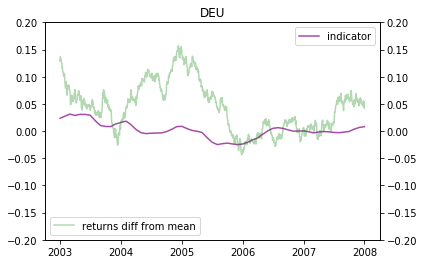

0.30154796830628705
['2008-01-01', '2016-01-01']


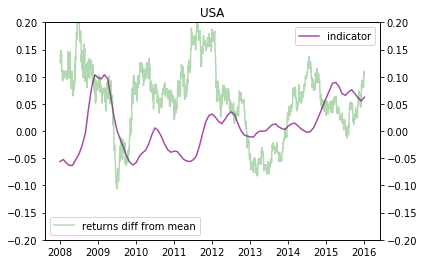

-0.17984044131665902


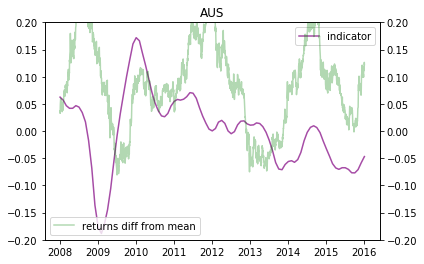

0.14435448921217056


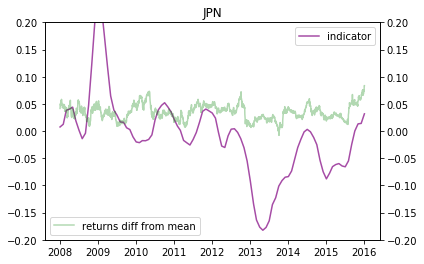

0.25261918733473376


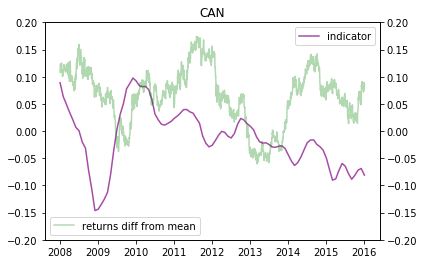

0.07585439855831205


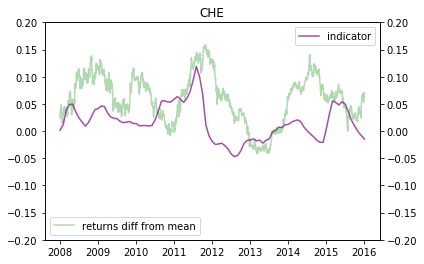

0.3686315756381221


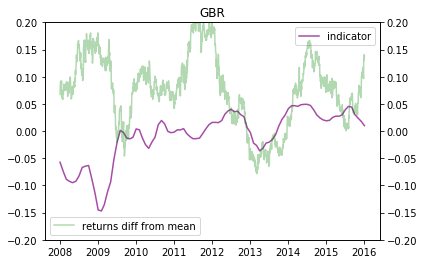

-0.1959438879643334


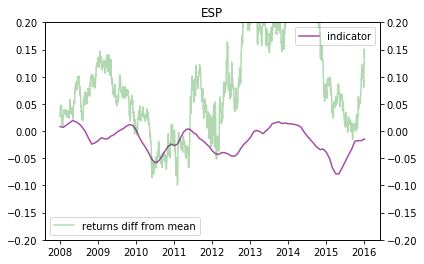

0.4116257515411225


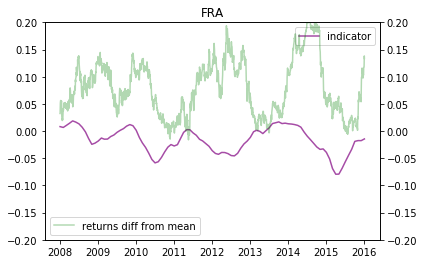

0.16007234893896471


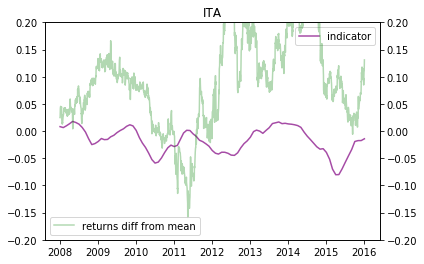

0.144736601393206


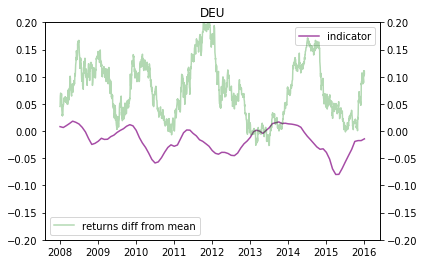

0.16126921073095818
['2016-01-01', '2020-01-01']


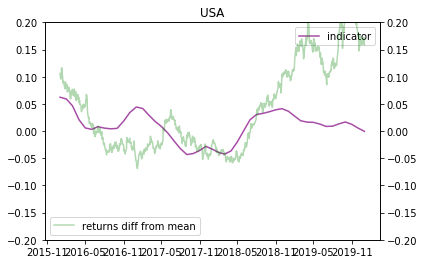

0.3925578627931868


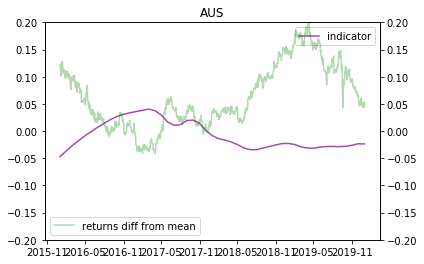

-0.7782685790872049


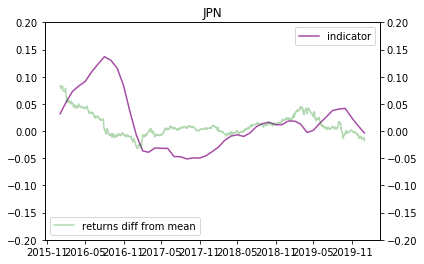

0.17995584268525136


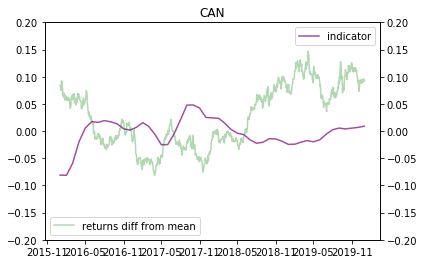

-0.5079834511929443


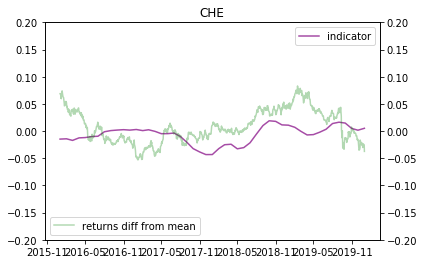

0.08051365331016959


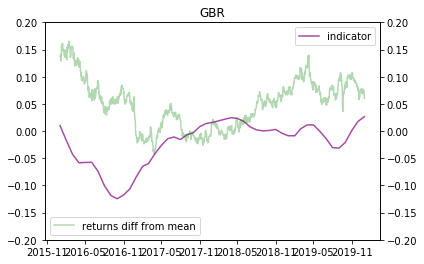

0.00529848646775767


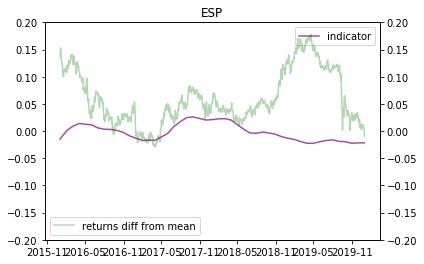

-0.17776386018028761


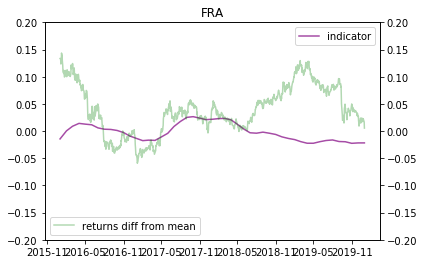

-0.20148427850636505


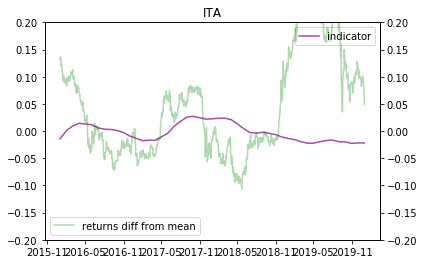

-0.5383558001405157


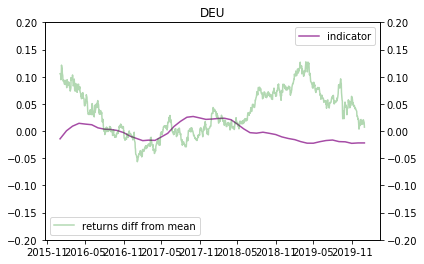

-0.2974968557530601


In [29]:
uf.plot_vs_returns(countryList, change_in_twi_proxy, half_shifted_returns, tfs, scale=True, correlation=True)

In [30]:
indicator_three = gi.generate_indicator_three(change_in_twi_proxy)


['1986-01-01', '1995-01-01']


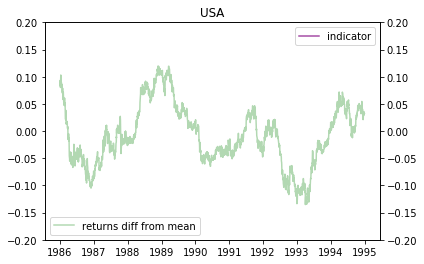

nan


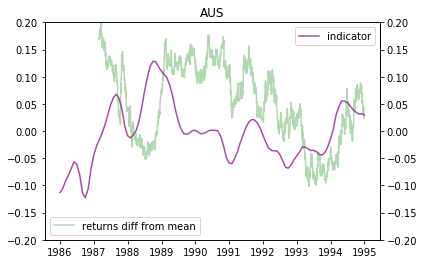

0.14575936717955645


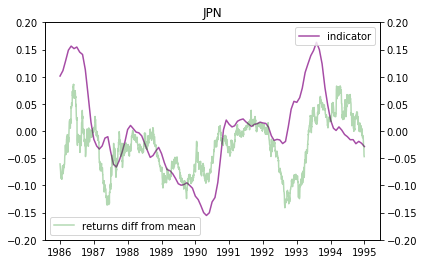

0.4693380781890143


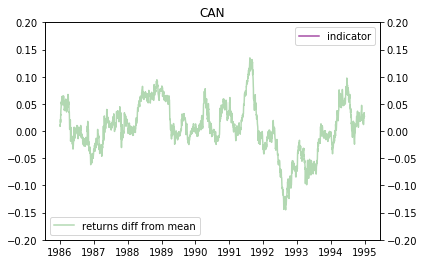

nan


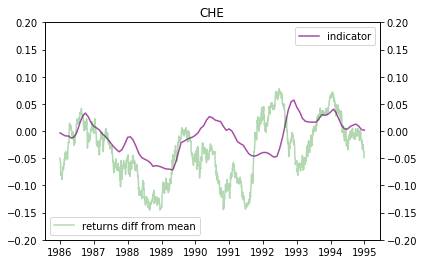

0.3270352154463536


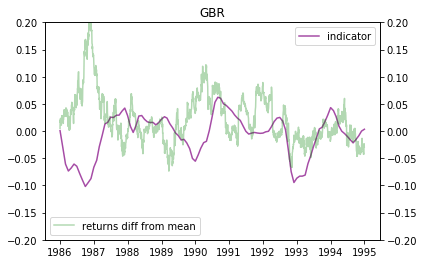

-0.32139847121895176


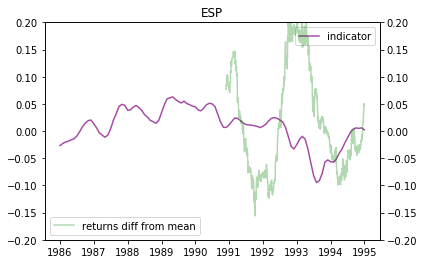

-0.039529283897789556


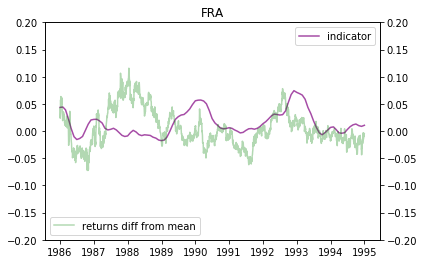

0.0075087809142686335


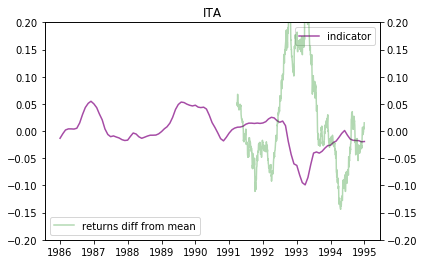

-0.5818421886094933


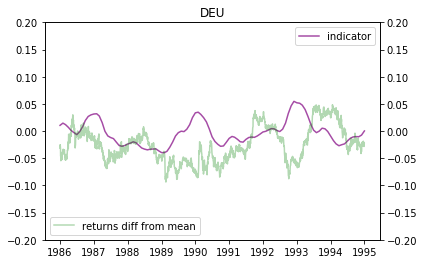

-0.05985447543171597
['1995-01-01', '2003-01-01']


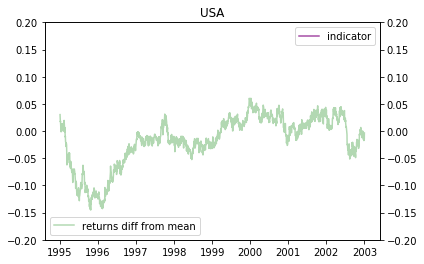

nan


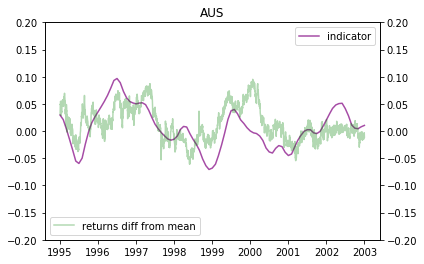

0.473883642111834


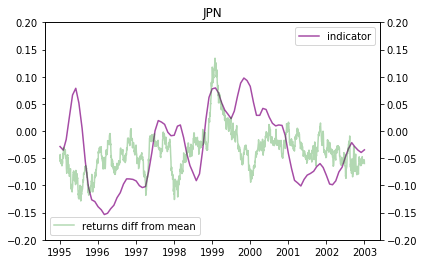

0.22422961829745275


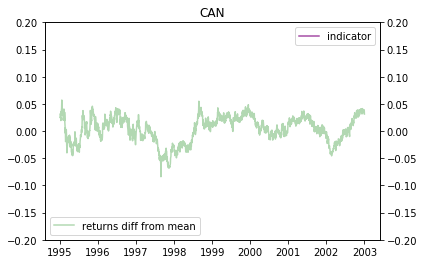

nan


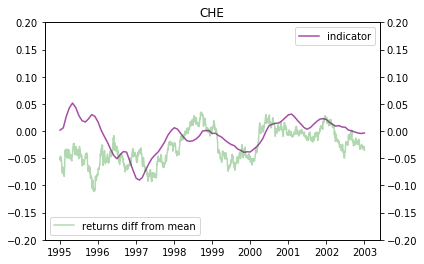

0.32729403414677755


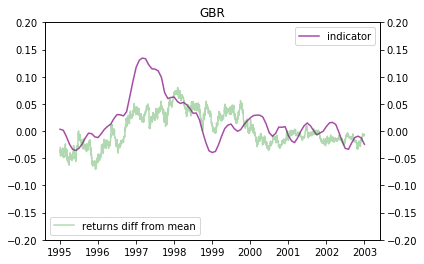

0.530280559022797


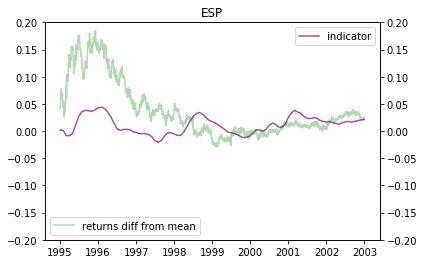

0.25291766588260206


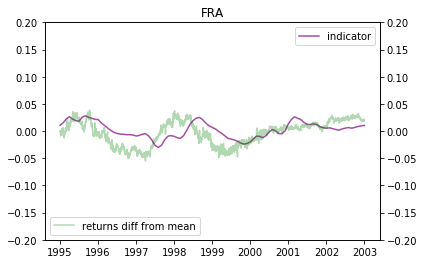

0.3961961297432065


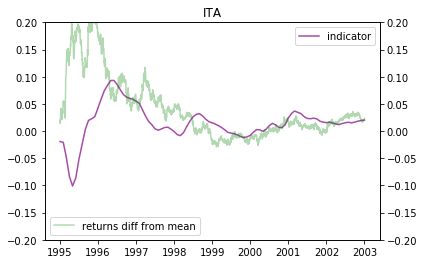

-0.10969765903208742


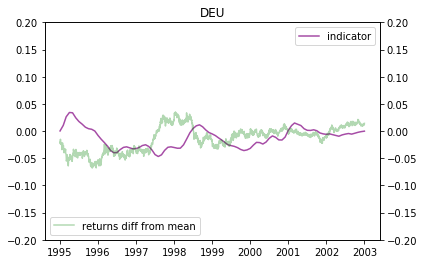

-0.2205759237126111
['2003-01-01', '2008-01-01']


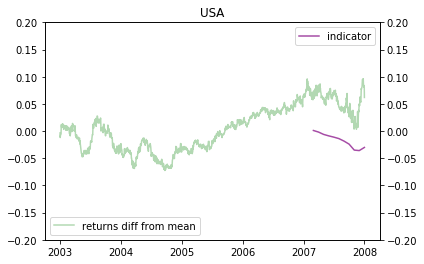

0.1429720208666158


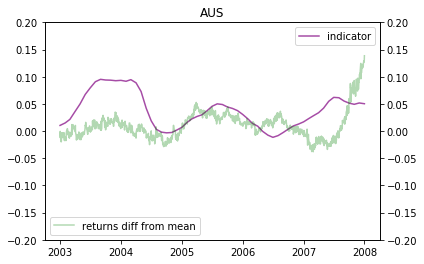

0.15424064972663984


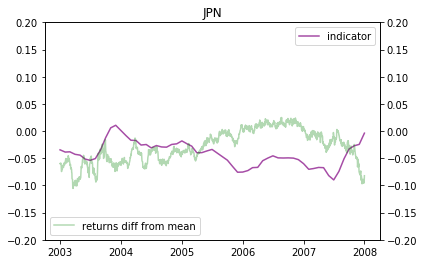

-0.583884838723256


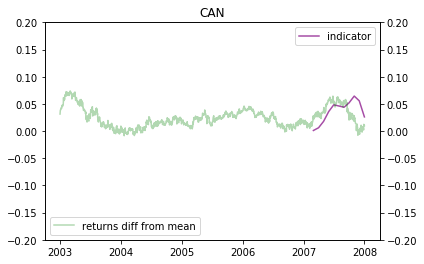

-0.3473675940397398


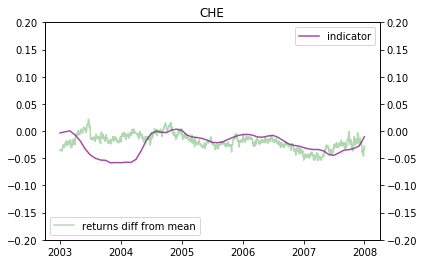

0.148886296734302


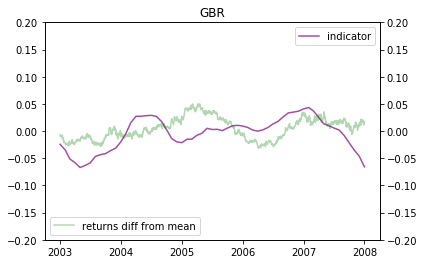

0.27048890846289086


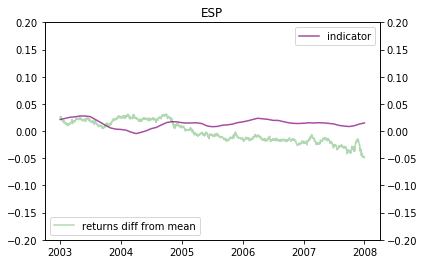

-0.16040581443394678


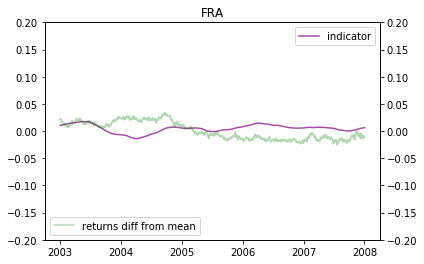

-0.35800895315108777


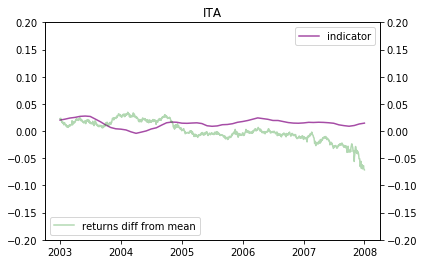

-0.10642214903690428


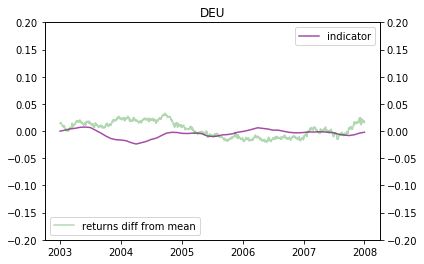

-0.4739913061655581
['2008-01-01', '2016-01-01']


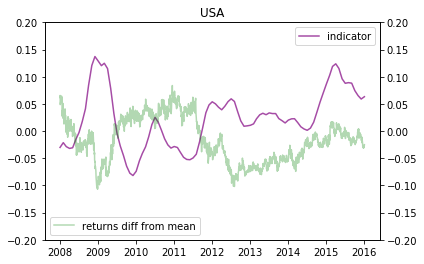

-0.532934858926166


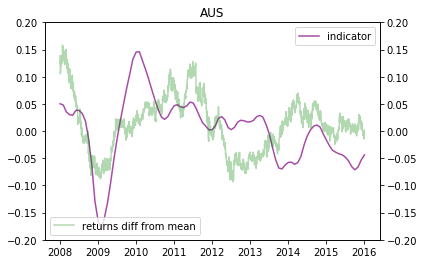

0.40856075278625537


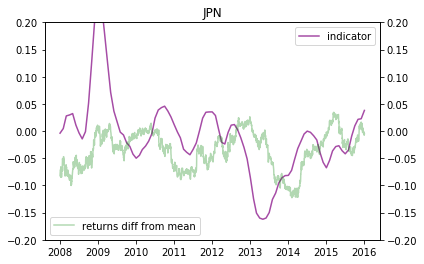

0.21322280935051643


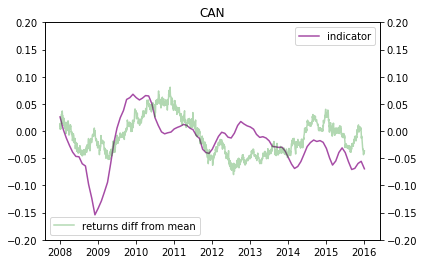

0.4233126891859275


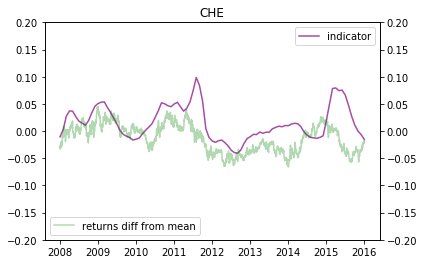

0.3869358976401113


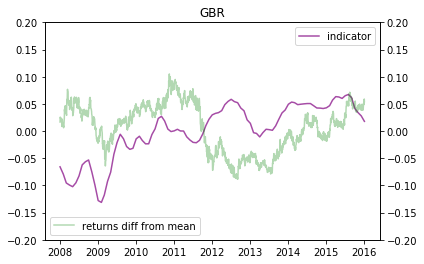

-0.20129742157491387


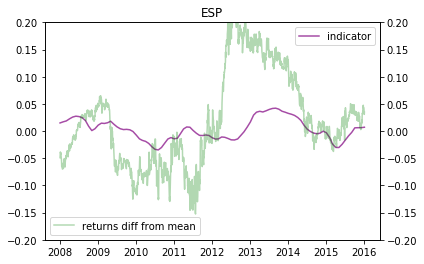

0.3781193462645196


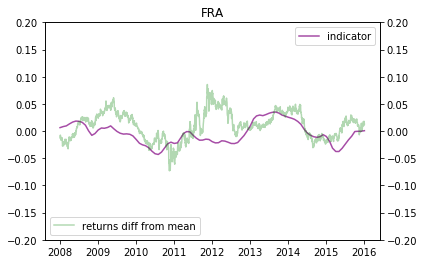

0.3976687688400783


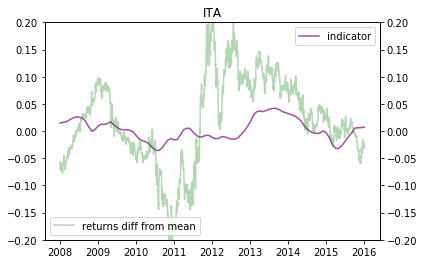

0.395582727600621


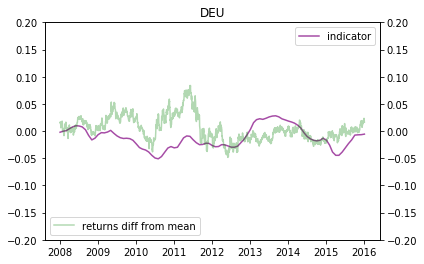

0.010836954673437711
['2016-01-01', '2020-01-01']


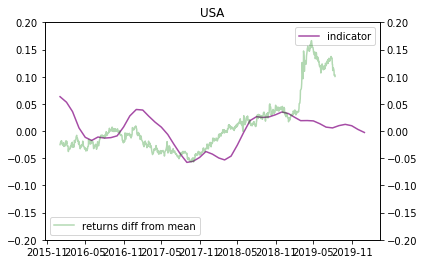

0.3042171744634019


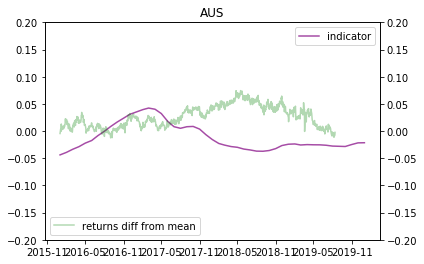

-0.24792140853477282


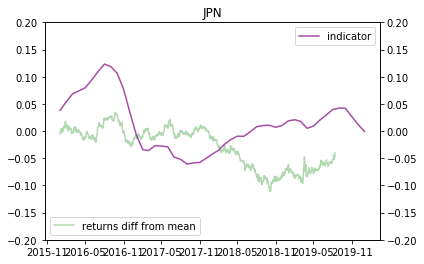

0.1688691667458736


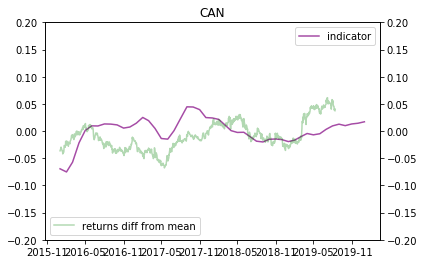

-0.03276953646276018


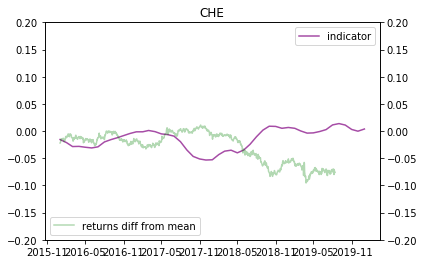

-0.6455826465723552


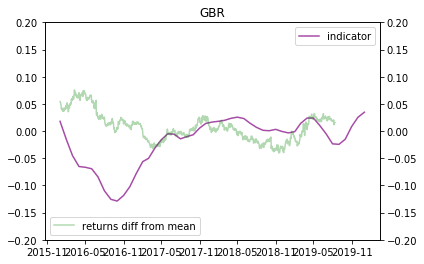

-0.25450040626496884


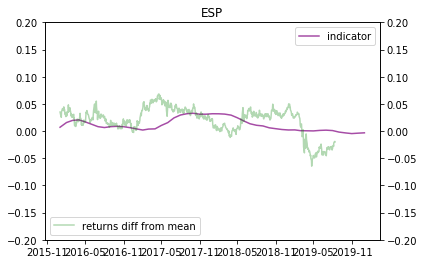

0.203727065479262


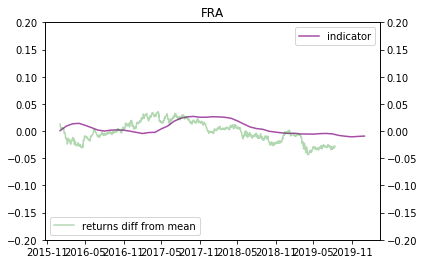

0.3874320850079598


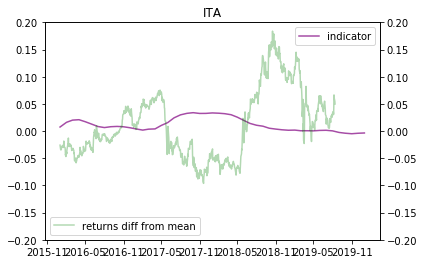

-0.7309595675668721


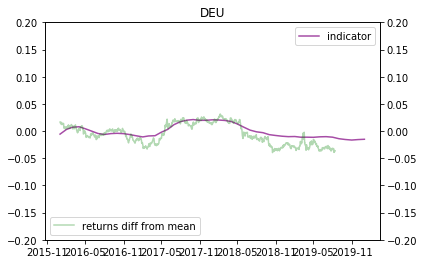

0.8429356911446053


In [31]:
uf.plot_vs_returns(countryList, indicator_three, shifted_returns_diff_from_mean, tfs, correlation=True)

['1986-01-01', '1995-01-01']


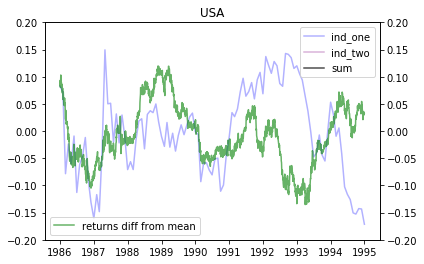

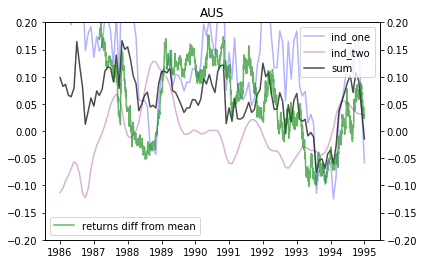

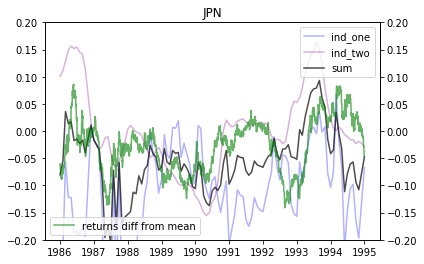

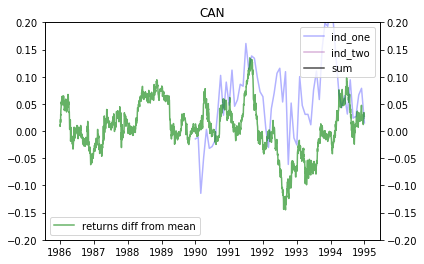

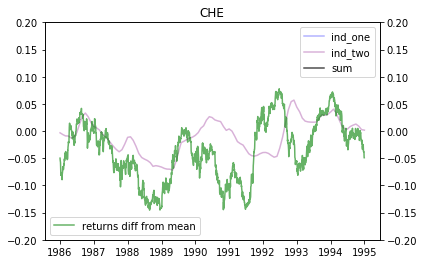

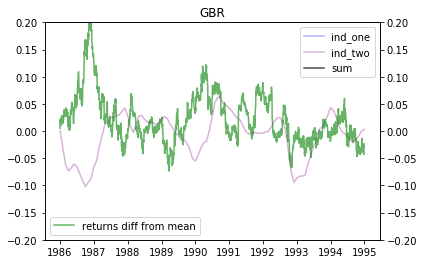

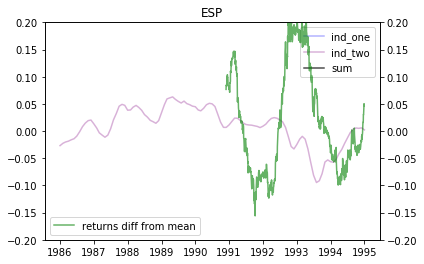

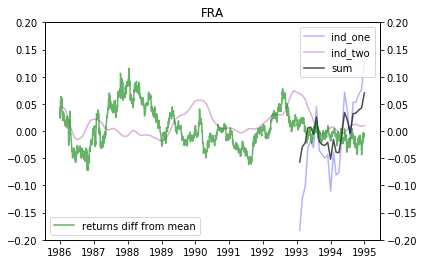

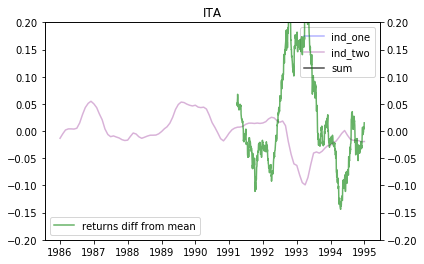

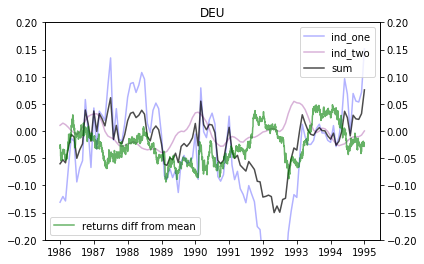

['1995-01-01', '2003-01-01']


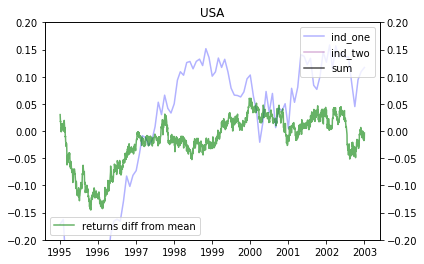

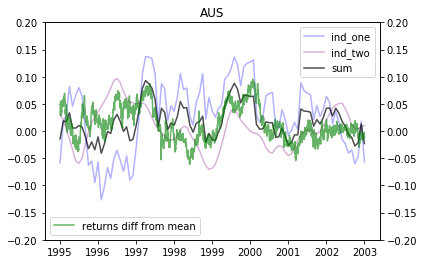

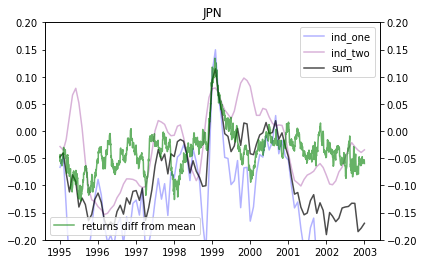

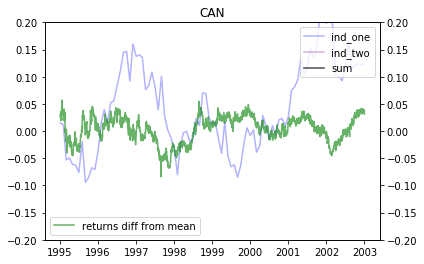

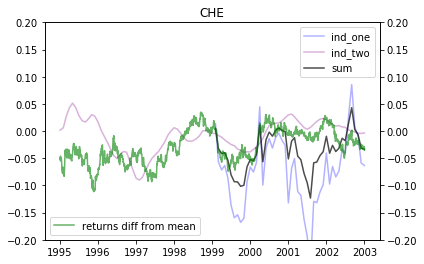

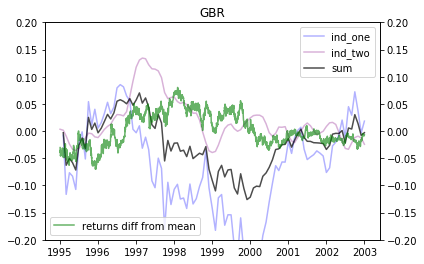

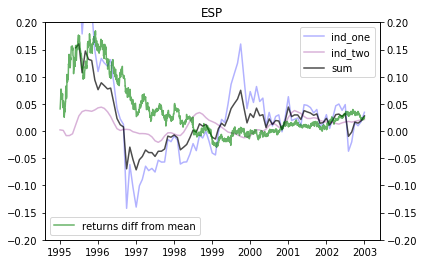

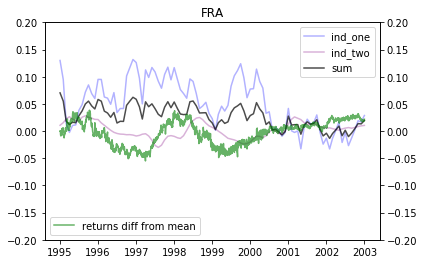

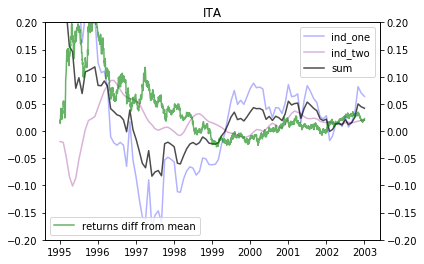

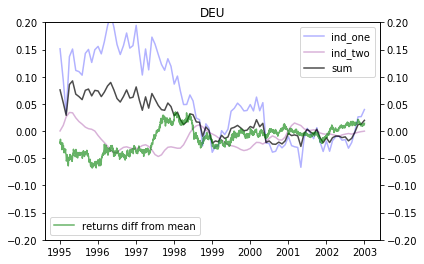

['2003-01-01', '2008-01-01']


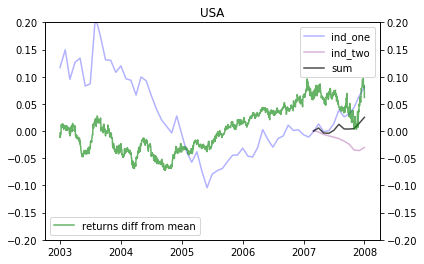

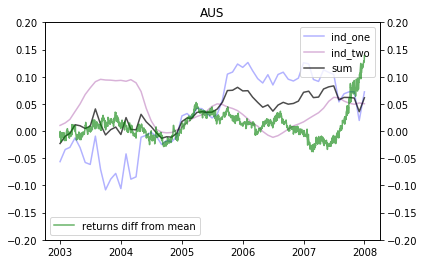

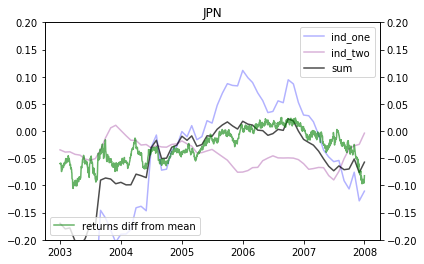

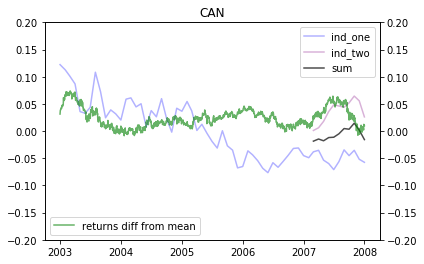

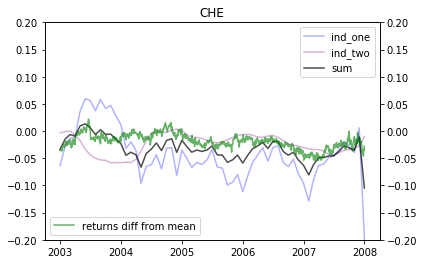

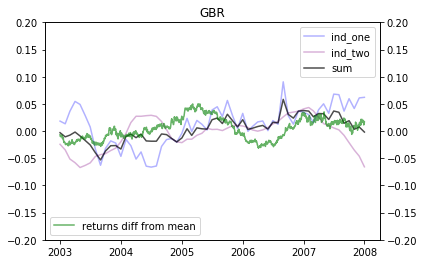

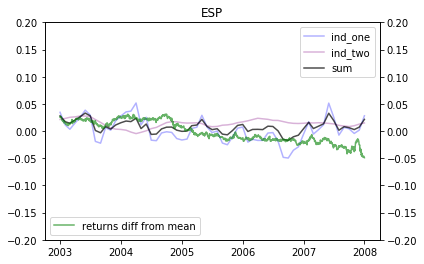

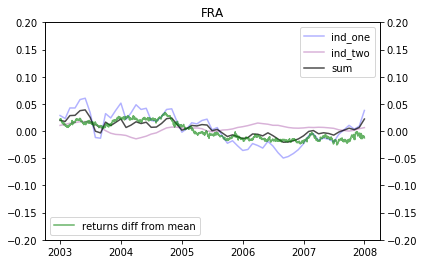

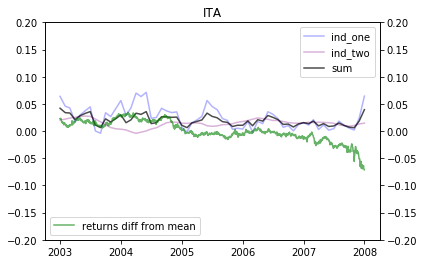

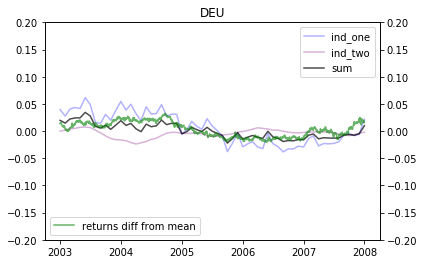

['2008-01-01', '2016-01-01']


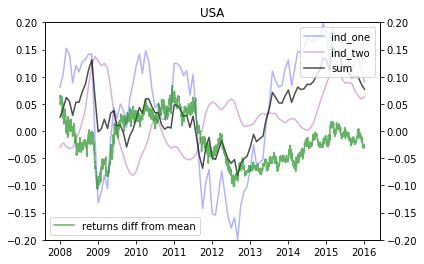

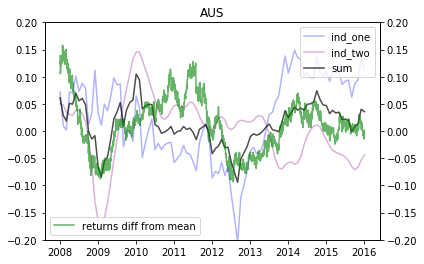

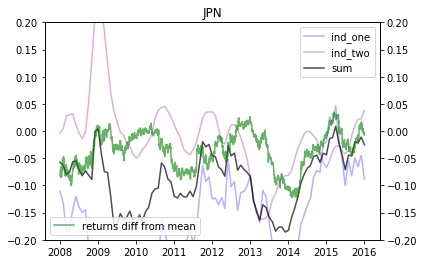

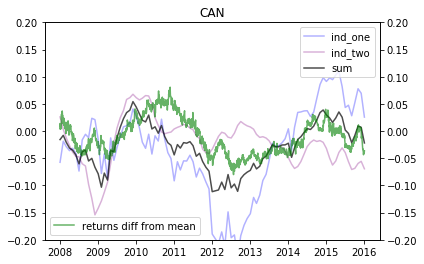

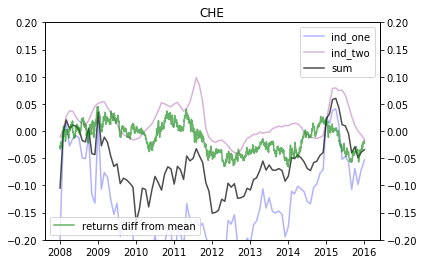

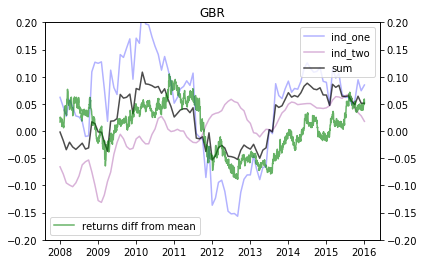

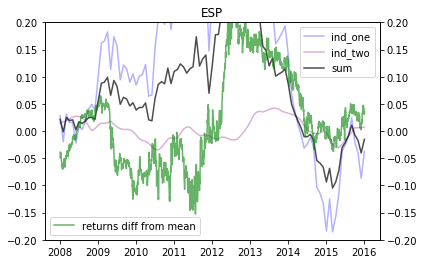

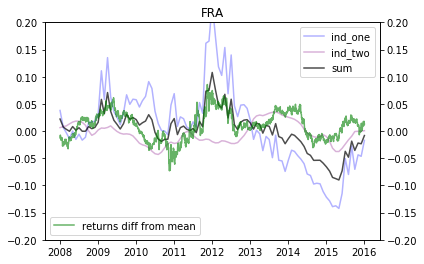

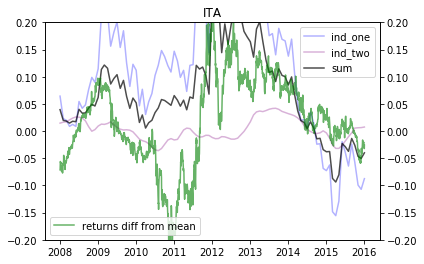

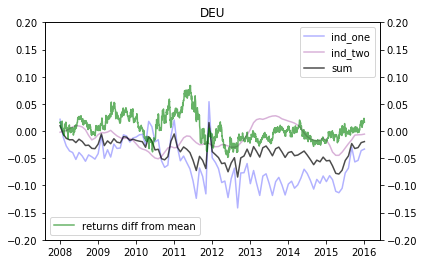

['2016-01-01', '2020-01-01']


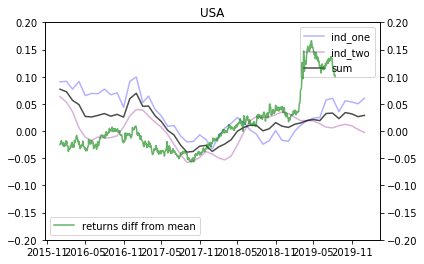

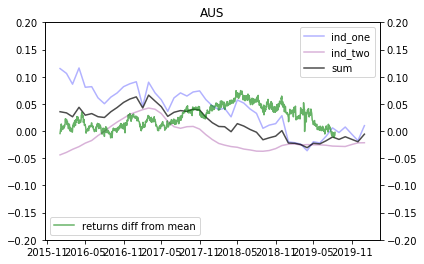

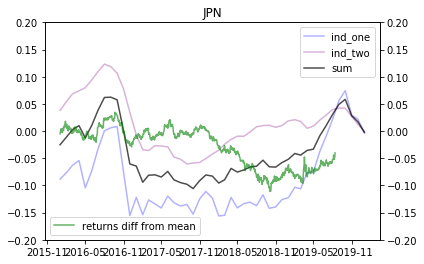

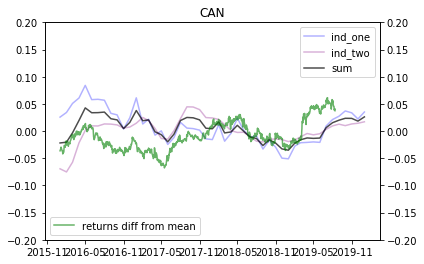

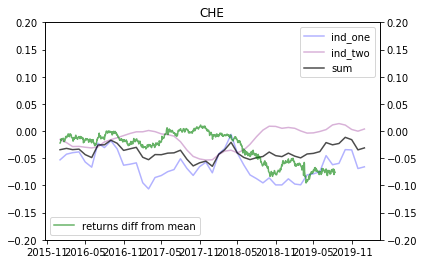

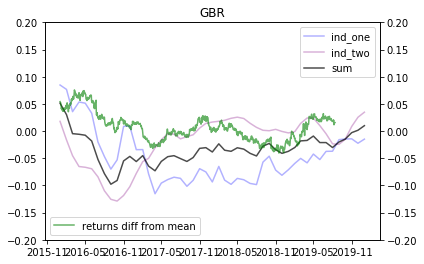

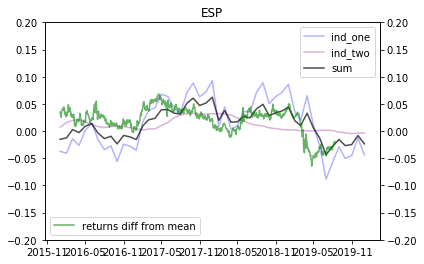

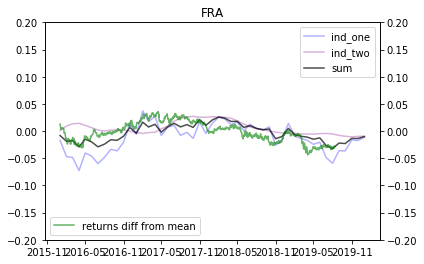

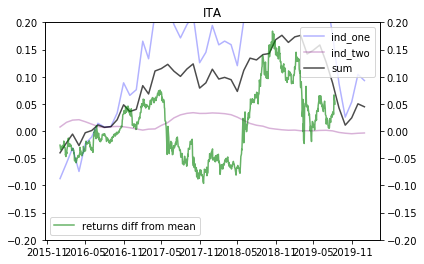

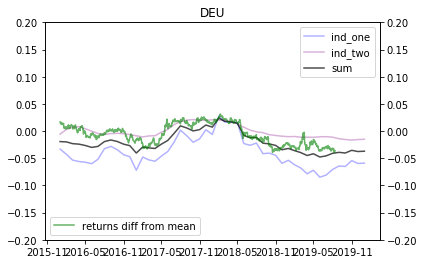

In [32]:
#plotting both signals
tf0 = ["1986-01-01", "1995-01-01"]
tf1 = ["1995-01-01", "2003-01-01"]
tf2 = ["2003-01-01", "2008-01-01"]
tf3 = ["2008-01-01", "2016-01-01"]
tf4 = ["2016-01-01", "2020-01-01"]
tfs = [tf0, tf1, tf2, tf3, tf4]
for tf in tfs:
    print(tf)
    for country in locs:
        fig, ax1 = plt.subplots()
        ax2 = ax1.twinx()
        ax1.plot(indicator_one.loc[tf[0]:tf[1],country].to_timestamp(), color = 'blue', alpha=.3)
        ax1.plot(indicator_three.loc[tf[0]:tf[1],country].to_timestamp(), color = 'purple', alpha=.3)
        combined = indicator_one.loc[tf[0]:tf[1],country] + indicator_three.loc[tf[0]:tf[1],country]
        avg = combined /2
        #ax1.plot(combined.to_timestamp(), color = 'orange', alpha=.7)
        ax1.plot(avg.to_timestamp(), color = 'black', alpha=.7)
        ax2.plot(shifted_returns_diff_from_mean.loc[tf[0]:tf[1],country].to_timestamp(), color='green', alpha=.6)
        ax1.legend(["ind_one", "ind_two", "sum", "average"], loc = 'upper right')
        ax2.legend(["returns diff from mean"], loc="lower left")
        ax1.set(ylim=(-.2, .2))
        ax2.set(ylim=(-.2, .2))
        uf.align_yaxis(ax1, 0, ax2, 0)
        plt.title(country)
        plt.show()

In [33]:
signal_one = indicator_one.resample('Q').last().applymap(gi.rescale_mapping_one)

In [34]:
p_and_l_one = uf.create_p_and_l(signal_one, bondReturnIdx_locFX, countryList)

In [35]:
p_and_l_one_total = p_and_l_one.mean(axis=1)

In [36]:
ev_signal_one = p_and_l_one_total[20:].mean() * 4
std_signal_one = p_and_l_one_total[20:].std() * 2
print(ev_signal_one, std_signal_one)

0.006065013477021919 0.014263091790717202


In [37]:
RaR_one = ev_signal_one / std_signal_one
RaR_one

0.42522431784174525

In [38]:
corr_returns_one = p_and_l_one_total[20:].corr(quarterly_returns_shifted.mean(axis=1))
print(corr_returns_one)

-0.10119051052217584


In [39]:
signal_three = indicator_three.resample("Q").last().applymap(gi.rescale_mapping_three)

In [40]:
p_and_l_three = uf.create_p_and_l(signal_three, bondReturnIdx_locFX, countryList)
p_and_l_three

country       USA       AUS           JPN       CAN           CHE       GBR  \
date                                                                          
1980Q1        NaN       NaN           NaN       NaN           NaN       NaN   
1980Q2        NaN       NaN           NaN       NaN           NaN       NaN   
1980Q3        NaN       NaN           NaN       NaN           NaN       NaN   
1980Q4        NaN       NaN           NaN       NaN           NaN       NaN   
1981Q1        NaN       NaN           NaN       NaN -0.000000e+00 -0.000000   
1981Q2        NaN       NaN           NaN       NaN -1.116591e-03  0.001348   
1981Q3        NaN       NaN           NaN       NaN  3.897145e-02 -0.066193   
1981Q4        NaN       NaN           NaN       NaN  4.556333e-02 -0.135474   
1982Q1        NaN       NaN           NaN       NaN  1.730369e-02 -0.002562   
1982Q2        NaN       NaN           NaN       NaN -8.039133e-04  0.001021   
1982Q3        NaN       NaN           NaN       NaN -1.083640e-02  0.014889   
1982Q4        NaN       NaN           NaN       NaN  5.989506e-04  0.000015   
1983Q1        NaN       NaN           NaN       NaN  2.204137e-05 -0.008554   
1983Q2        NaN       NaN           NaN       NaN  8.275548e-05 -0.002896   
1983Q3        NaN       NaN           NaN       NaN  9.013886e-05  0.001287   
1983Q4        NaN       NaN  1.834909e-02       NaN -5.520764e-05  0.000242   
1984Q1        NaN       NaN -3.029963e-04       NaN  4.585914e-04  0.000104   
1984Q2        NaN       NaN  1.104933e-03       NaN  8.621257e-04 -0.010728   
1984Q3        NaN       NaN -6.577336e-03       NaN -1.321149e-02 -0.000086   
1984Q4        NaN       NaN  3.772544e-04       NaN  8.086783e-05 -0.014089   
1985Q1        NaN       NaN -8.601773e-03       NaN -5.764065e-03 -0.002992   
1985Q2        NaN       NaN -6.914878e-03       NaN -3.611579e-03  0.080340   
1985Q3        NaN       NaN -5.697474e-06       NaN  6.490646e-05  0.026587   
1985Q4        NaN       NaN  8.034704e-02       NaN  9.497255e-05  0.022878   
1986Q1        NaN       NaN -1.811517e-02       NaN  2.904445e-04 -0.002403   
1986Q2        NaN       NaN -3.834344e-02       NaN -1.394672e-03  0.047937   
1986Q3        NaN       NaN  3.569444e-02       NaN  1.953425e-03 -0.048089   
1986Q4        NaN       NaN  6.239879e-03       NaN  8.235628e-04 -0.100364   
1987Q1        NaN -0.004124 -3.036904e-04       NaN  8.550491e-06 -0.006490   
1987Q2        NaN  0.014764  4.072132e-03       NaN  1.415689e-03 -0.003111   
...           ...       ...           ...       ...           ...       ...   
2013Q2  -0.001349 -0.000045 -1.832611e-02  0.000125 -2.513008e-06 -0.000003   
2013Q3  -0.006830  0.007136  1.994156e-03  0.003196 -2.449960e-05 -0.000565   
2013Q4   0.002272 -0.019203 -1.067868e-02 -0.014481  9.513224e-04  0.012054   
2014Q1   0.004004 -0.040087 -6.153159e-03 -0.019913  1.954448e-03  0.007045   
2014Q2   0.000034 -0.002338 -6.835200e-05 -0.005366 -1.739218e-05  0.021066   
2014Q3   0.002982  0.001919 -5.154162e-04 -0.002949 -7.514978e-04  0.032020   
2014Q4   0.020638 -0.000368  1.684339e-03 -0.006009 -9.441466e-04  0.008200   
2015Q1  -0.031627  0.016190  1.042679e-03  0.016875 -1.281640e-02 -0.023067   
2015Q2   0.031534 -0.017682 -4.510222e-03 -0.006428  1.753981e-02  0.025942   
2015Q3  -0.014762  0.008768 -2.565792e-04 -0.006616 -9.312620e-04 -0.008628   
2015Q4   0.031685 -0.023693  4.802307e-03 -0.012099 -3.946365e-04  0.011452   
2016Q1   0.010945 -0.013769  1.524544e-02 -0.017883 -4.531525e-03 -0.025173   
2016Q2   0.000734 -0.001053 -1.258578e-02  0.000219  2.460964e-04 -0.020829   
2016Q3   0.002666 -0.001377 -1.104989e-02 -0.002877  2.507722e-03  0.039607   
2016Q4   0.001649  0.002901 -2.442158e-04  0.000197  2.127400e-05 -0.017214   
2017Q1   0.001973  0.006736  1.039546e-04 -0.000347 -3.113594e-06  0.003868   
2017Q2  -0.000073 -0.000779 -7.103790e-04  0.001732  2.003256e-05  0.000025   
2017Q3   0.001348  0.000408 -1.912992e-03  0.00392

In [41]:
p_and_l_three_total = p_and_l_three.replace(0, np.NaN).mean(axis=1)

In [42]:
ev_signal_three = p_and_l_three_total[20:].mean() * 4
std_signal_three = p_and_l_three_total[20:].std() * 2
print(ev_signal_three, std_signal_three)

0.0036633353161700105 0.011323629037411976


In [43]:
RaR_three = ev_signal_three / std_signal_three
RaR_three

0.3235124803247059

In [44]:
corr_returns_three = p_and_l_three_total[20:].corr(quarterly_returns_shifted.mean(axis=1))
print(corr_returns_three)

-0.027692969279037038


In [45]:
cross_corr = p_and_l_three_total[20:].corr(p_and_l_one_total)
print(cross_corr)

-0.06878592864864119


In [46]:
combined_p_and_l = .5 * p_and_l_one + .5 * p_and_l_three
combined_total_p_and_l = combined_p_and_l.mean(axis=1)

In [47]:
ev_combined = combined_total_p_and_l[20:].mean() * 4
std_combined = combined_total_p_and_l[20:].std() * 2
print(ev_combined, std_combined)

0.0036552302120109403 0.011772103127207868


In [48]:
RaR_total = ev_combined / std_combined
RaR_total

0.3104993366531861

In [49]:
print(combined_total_p_and_l[20:].corr(quarterly_returns_shifted.mean(axis=1)))

-0.21085786638928153


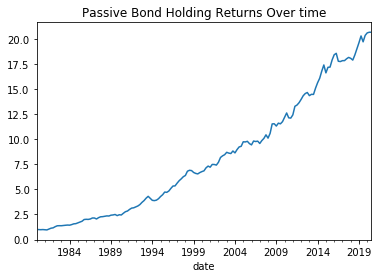

In [50]:
(quarterly_returns_shifted.mean(axis=1) + 1).cumprod().plot()
plt.title("Passive Bond Holding Returns Over time")
plt.show()

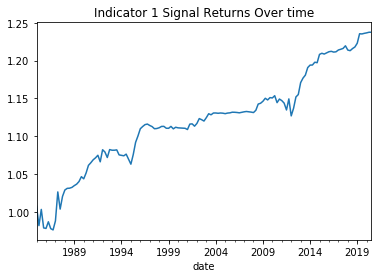

In [51]:
returns_over_time_one = p_and_l_one_total + 1
returns_over_time_one[20:].cumprod().plot()
plt.title("Indicator 1 Signal Returns Over time")
plt.show()

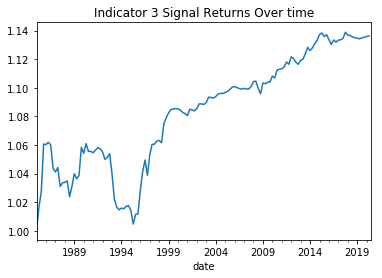

In [52]:
returns_over_time_three = p_and_l_three_total + 1
returns_over_time_three[20:].cumprod().plot()
plt.title("Indicator 3 Signal Returns Over time")
plt.show()

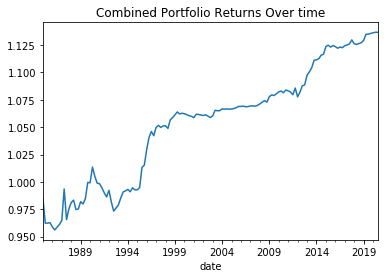

In [53]:
returns_over_time_combined = combined_total_p_and_l + 1
returns_over_time_combined[20:].cumprod().plot()
plt.title("Combined Portfolio Returns Over time")
plt.show()

In [54]:
indicator_average = (indicator_one + indicator_three * 3) / 4

In [55]:
signal_average = indicator_average.applymap(gi.rescale_mapping_three)

In [56]:
average_signal_p_and_l = uf.create_p_and_l(signal_average, bondReturnIdx_locFX, countryList)

In [57]:
av_signal_p_and_l_total = average_signal_p_and_l.mean(axis=1)

In [58]:
ev_av = av_signal_p_and_l_total[20:].mean() * 4
std_av = av_signal_p_and_l_total[20:].std() * 2
print(ev_av, std_av)

0.006974906744811943 0.018873845364162187


In [59]:
print(av_signal_p_and_l_total[20:].corr(quarterly_returns_shifted.mean(axis=1)))

-0.17904172270101773


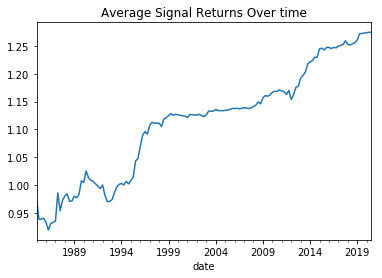

In [60]:
returns_over_time_combined = av_signal_p_and_l_total + 1
returns_over_time_combined[20:].cumprod().plot()
plt.title("Average Signal Returns Over time")
plt.show()

In [61]:
for country in countryList:
    a = combined_p_and_l[country][20:].mean() * 4
    b = combined_p_and_l[country][20:].std() * 2
    print(a, b, country)

0.006530857738855314 0.02615923975835356 USA
0.017652859455757564 0.022209401443650884 AUS
-0.010526895103230117 0.0323044678321112 JPN
-0.0008023978866667188 0.014949323836005578 CAN
-0.0025485106702988 0.008546149482489265 CHE
0.003588487045307998 0.018882324285792132 GBR
0.015714459583202698 0.024442259601326732 ESP
0.004052699389875354 0.0076657315782768035 FRA
0.01831461391202962 0.028579790234297877 ITA
-0.0036175275236011014 0.009668387852817496 DEU


In [62]:
for country in countryList:
    a = average_signal_p_and_l[country][20:].mean() * 4
    b = average_signal_p_and_l[country][20:].std() * 2
    print(a, b, country)

0.01262435366775543 0.040545008134705206 USA
0.02902762056681531 0.03547510945769614 AUS
-0.01439226026745997 0.048589103427697504 JPN
-0.002704532256403558 0.021370038411146076 CAN
-0.0032659336238230058 0.013124352911908417 CHE
0.007039513303801173 0.030461677915857813 GBR
0.026997371595344245 0.03987493732664201 ESP
0.0051881979798583016 0.012310549847272164 FRA
0.033393646101865314 0.04651873152530607 ITA
-0.006352871283597525 0.015248467085925818 DEU


In [63]:
average_signal_p_and_l.mean(axis=0).mean()

0.002113041131421569

In [64]:
average_signal_p_and_l.stack().std()

0.01733319073549171